# TechnoServe: Sale Pipline Conversion

## Import Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_excel("Sales Dataset.xlsx")
df.head()

Opportunity ID           Technology\nPrimary       City    B2B Sales Medium  \
0      N00000001            ERP Implementation  Bengaluru           Marketing   
1      N00000002            ERP Implementation      Delhi  Enterprise Sellers   
2      N00000003  Technical Business Solutions      Delhi  Enterprise Sellers   
3      N00000004  Technical Business Solutions     Mumbai  Enterprise Sellers   
4      N00000005            ERP Implementation      Delhi  Enterprise Sellers   

   Sales Velocity Opportunity Status  Sales Stage Iterations  \
0              76                Won                      13   
1              63               Loss                       2   
2              24                Won                       7   
3              16               Loss                       5   
4              69               Loss                      11   

   Opportunity Size (USD) Client Revenue Sizing Client Employee Sizing  \
0                       0          More than 1M          More than 25K   
1                       0          250K to 500K          More than 25K   
2                    7750          100K or less             1K or less   
3                       0          100K or less             1K or less   
4                   32886          100K or less             1K or less   

  Business from Client Last Year Compete Intel Opportunity Sizing  
0                0 (No business)       Unknown        10K or less  
1                0 (No business)       Unknown        10K or less  
2                0 (No business)       Unknown        10K or less  
3                0 (No business)         Known        10K or less  
4                0 (No business)       Unknown         30K to 40K

In [3]:
duplicate_rows = df.duplicated()
df[duplicate_rows]

Empty DataFrame
Columns: [Opportunity ID, Technology
Primary, City, B2B Sales Medium, Sales Velocity, Opportunity Status, Sales Stage Iterations, Opportunity Size (USD), Client Revenue Sizing, Client Employee Sizing, Business from Client Last Year, Compete Intel, Opportunity Sizing]
Index: []

In [4]:
df.shape

(78025, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   78025 non-null  object
 12  Opportunity Sizing              78025 non-null

In [6]:
df.describe()

Sales Velocity  Sales Stage Iterations  Opportunity Size (USD)
count    78025.000000            78025.000000            78025.000000
mean        43.595348                2.955732            30085.664992
std         26.585600                1.497242            21169.932617
min          0.000000                1.000000                0.000000
25%         19.000000                2.000000            13816.000000
50%         43.000000                3.000000            29845.000000
75%         65.000000                3.000000            43185.000000
max        210.000000               23.000000           149981.000000

- There is no missing records in the dataset
- Numerical variables have outliers because max value is very high comparing to the 75% data distribution

# EDA (Exploratory Data Analysis)

### Univariate Analysis

#### Numerical Variables

In [7]:
numerical_variables = df.select_dtypes(exclude='object').columns.tolist()
numerical_variables

['Sales Velocity', 'Sales Stage Iterations', 'Opportunity Size (USD)']

In [8]:
# Function for univariate analysis
def numberical_univariate_analysis(variables):
    for variable in variables:
        #create subplot figure with having two side by side plots
        fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
        
        # first plot
        sns.distplot(df[variable], ax=axes[0])
        axes[0].set_title(variable, fontsize=20, color='red')
        
        # second plot
        sns.boxplot(df[variable], ax=axes[1])
        axes[0].set_title(variable, fontsize=20, color='red')

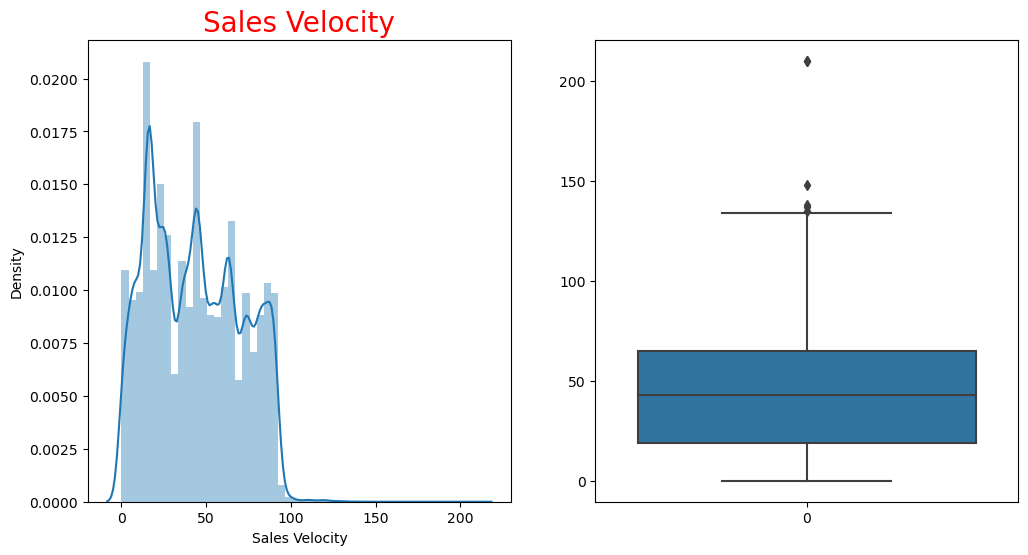

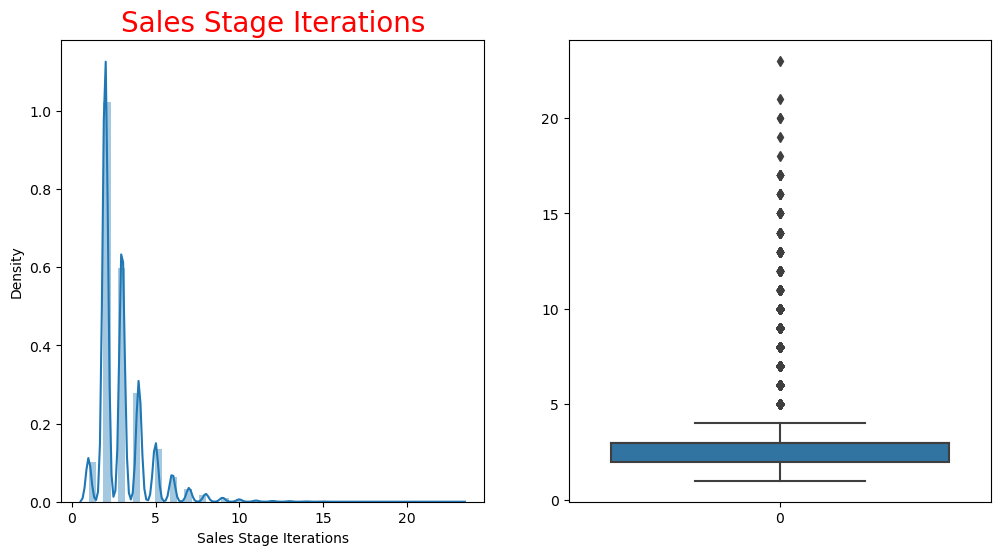

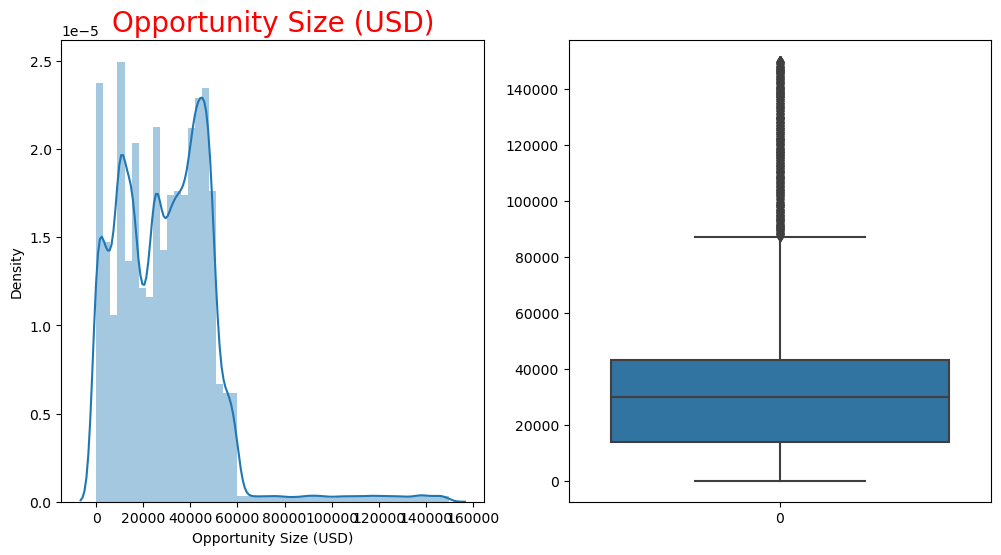

In [9]:
# Run the function
numberical_univariate_analysis(numerical_variables)

All three numerical variables have outliers. But I will not remove the outliers because these values are valid and they might have interesting insights.

We will remove "Opportunity Size (USD)" because we have "Opportunity Sizing (USD) which categorizing the client based on "Opportunity Size (USD)"

We will apply binning to "Sales Stage Iterations" to handling outliers.

#### Categorical Variables

In [10]:
categorical_variables = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_variables.remove('Opportunity ID')
categorical_variables

['Technology\nPrimary',
 'City',
 'B2B Sales Medium',
 'Opportunity Status',
 'Client Revenue Sizing',
 'Client Employee Sizing',
 'Business from Client Last Year',
 'Compete Intel',
 'Opportunity Sizing']

In [11]:
def categorical_univariate_analysis(variables):
    for variable in variables:
        df[variable].value_counts().plot.barh()
        plt.title(variable, fontsize=20, color='red')
        plt.show()

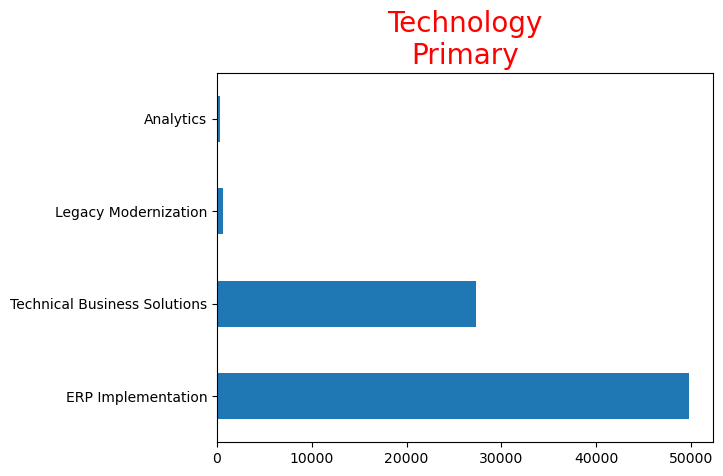

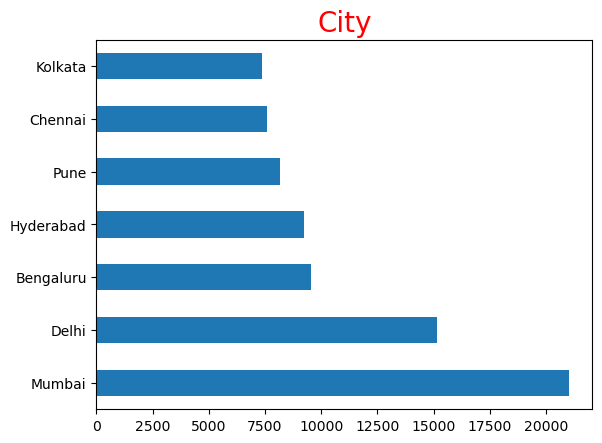

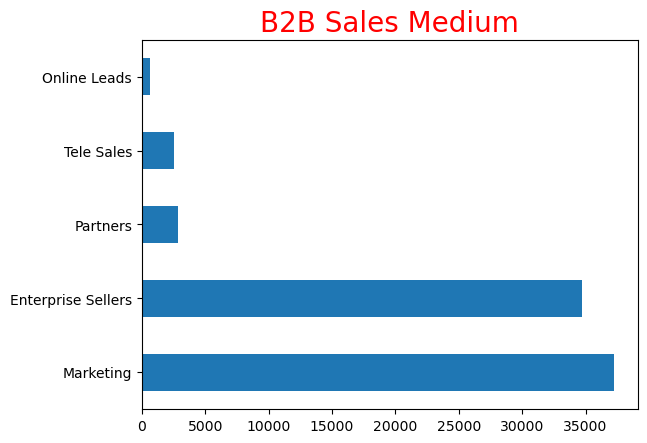

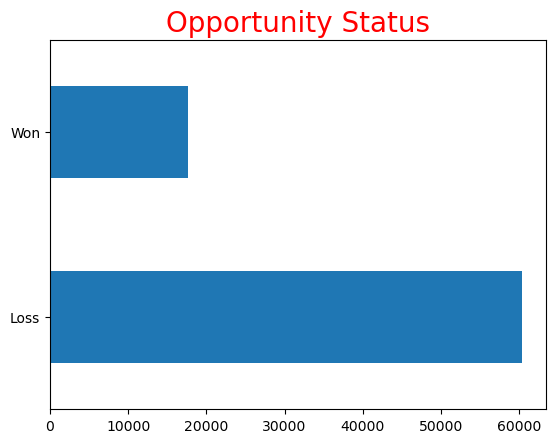

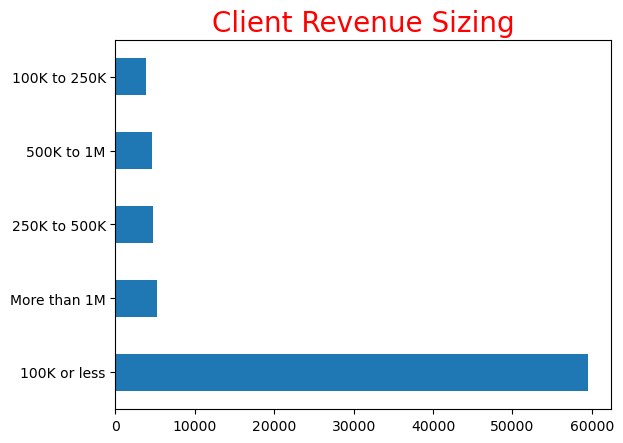

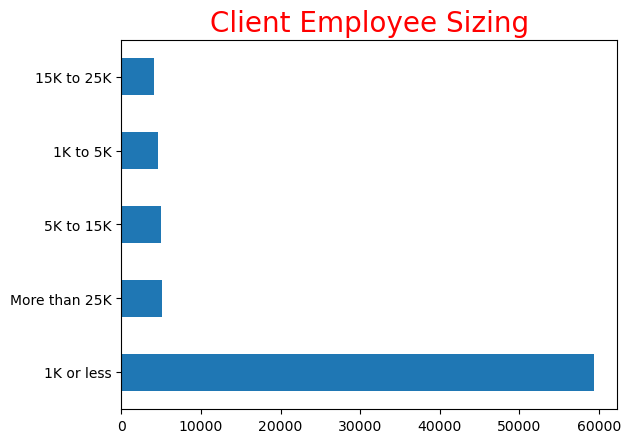

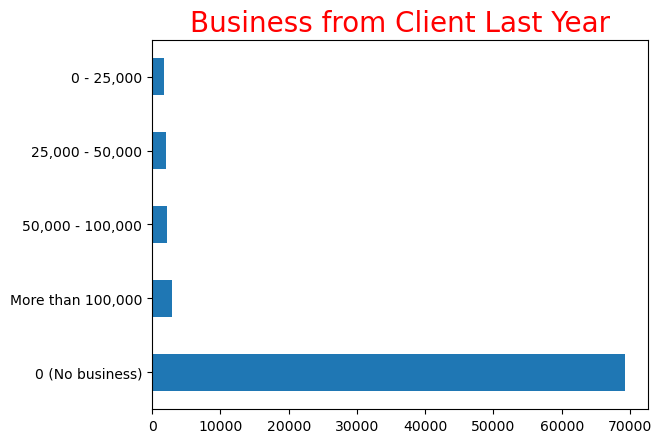

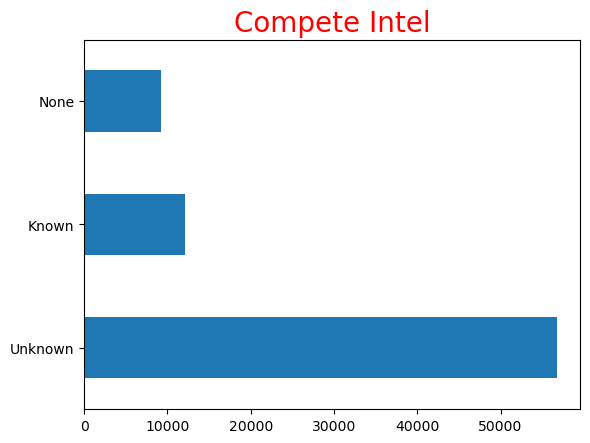

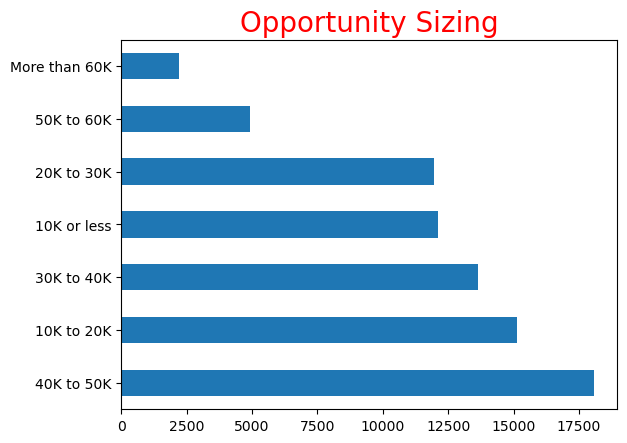

In [12]:
# Run
categorical_univariate_analysis(categorical_variables)

- "ERP Implementation" and "Technical Business Solutions" hold a large potion among all the products in the company.
- Mumbai is the best city for getting huge number of leads, while Kolkata is in the opposite side.
- "Marketing" and "Enterprise Sellers" are dominant in B2B Sales Medium, while "Online Leads" is not likely to attract customers.
- The ratio between "Won" and "Loss" in Opportunity Status is about 1/3. So the data is imbalanced.
- Most of the leads are from small business with low Revenue Sizing, Employee Sizing.
- Most of the clients did not spend their money to use TechnoServe services.
- The information about competitor mostly unknown or none.
- Most of the client potentially spend 40k - 50k USD forTechnoServe services, while they are less likely to spend more than 60k for the services.

In [13]:
# Check data imbalanced
df['Opportunity Status'].value_counts(normalize=True)

Loss    0.774085
Won     0.225915
Name: Opportunity Status, dtype: float64

### Bivariate Analysis

#### Numerical - Numerical Analysis

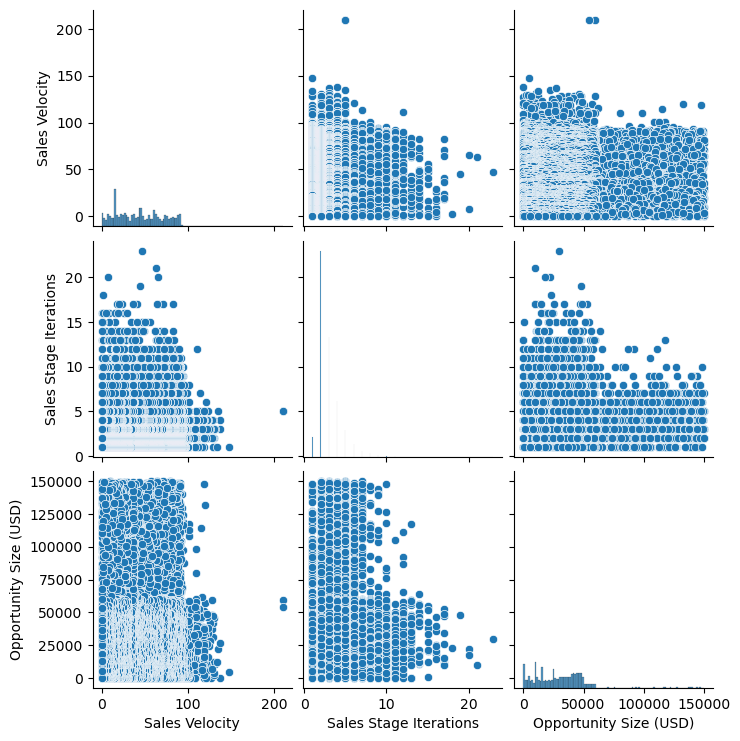

In [14]:
# We use scatter plot to spot if there are relationships between variables
sns.pairplot(df, vars=numerical_variables)
plt.show()

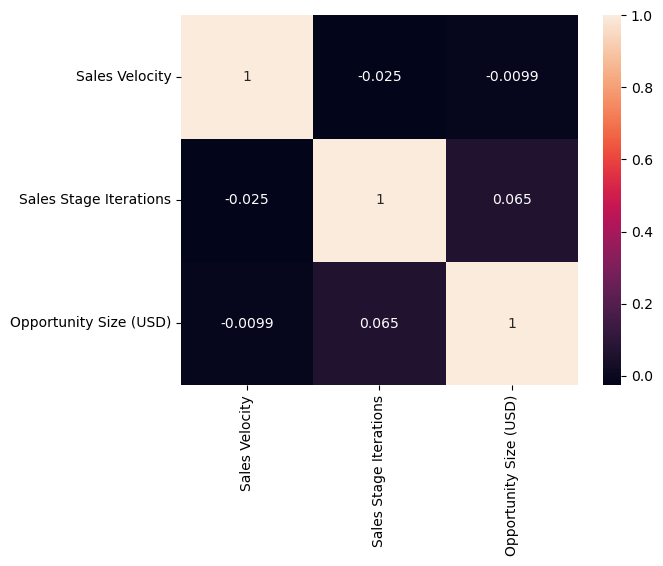

In [15]:
# We use heatmap to identify correlation coefficient between variables
sns.heatmap(df[numerical_variables].corr(), annot=True)
plt.show()

There is no linear relationship between numerical variables

#### Categorical - Numerical Analysis

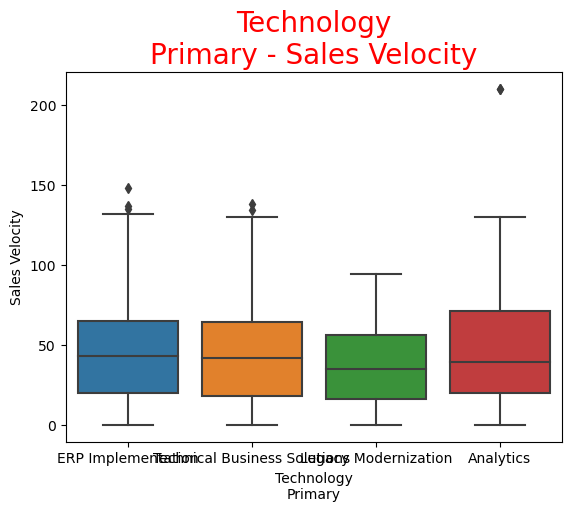

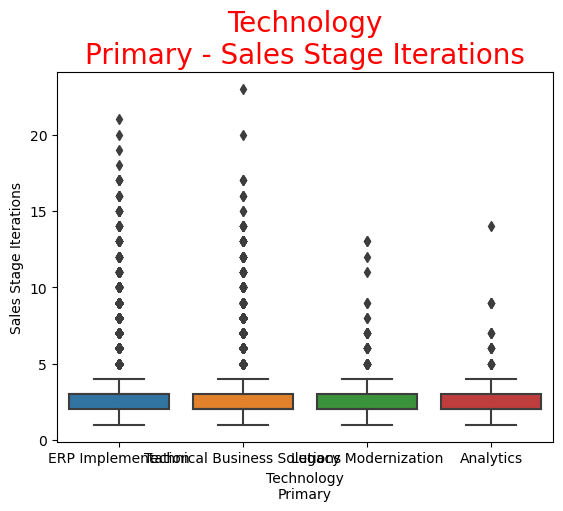

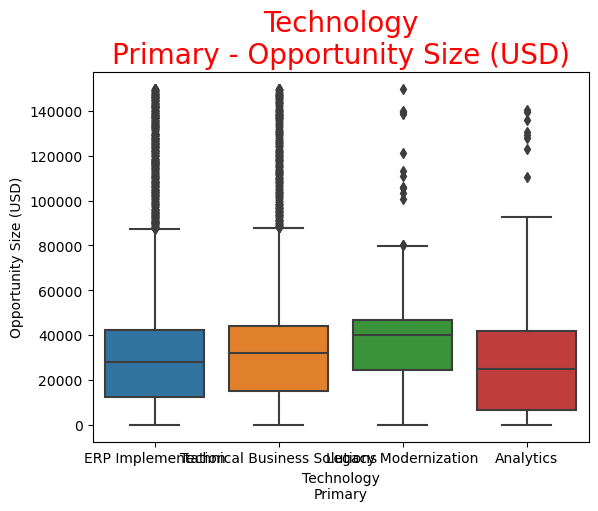

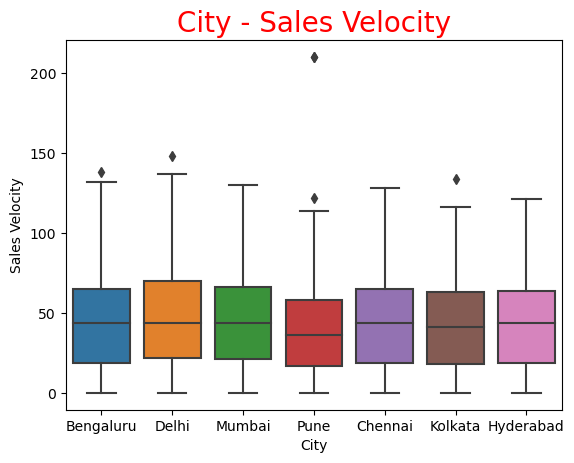

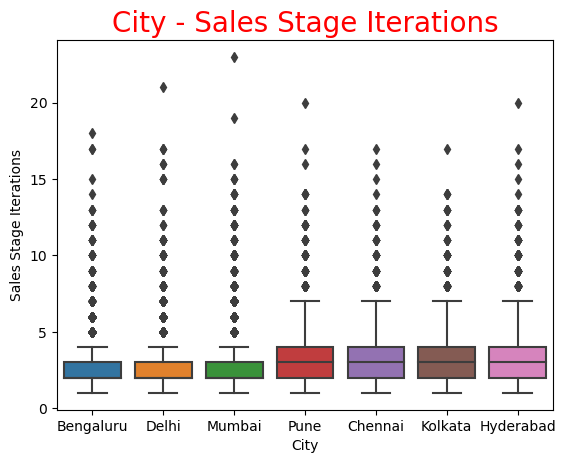

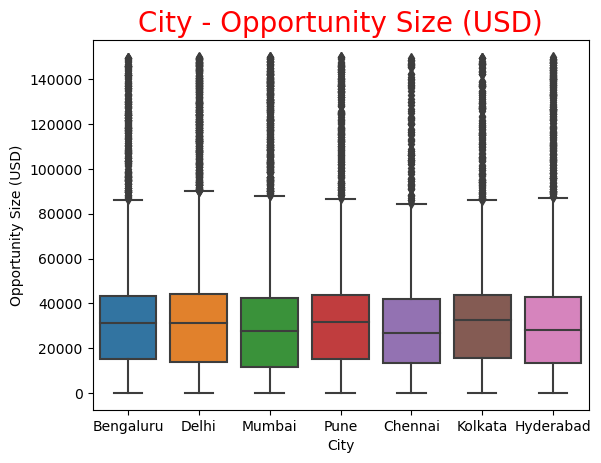

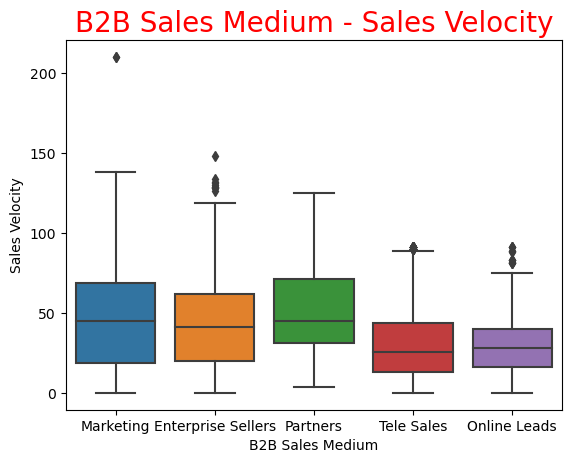

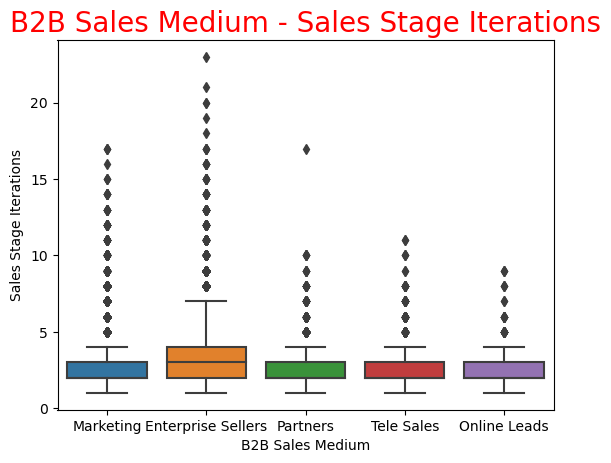

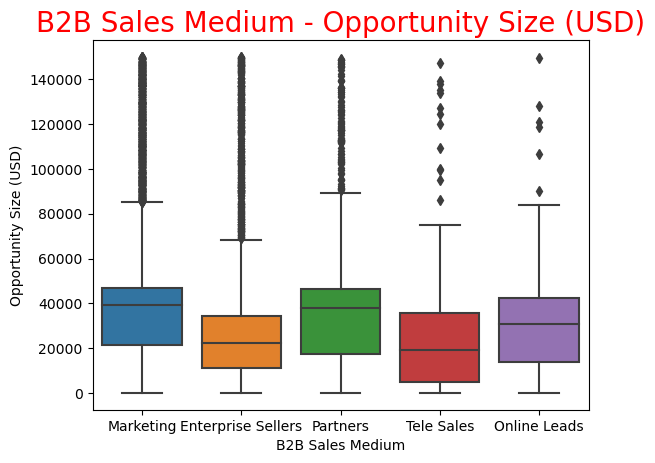

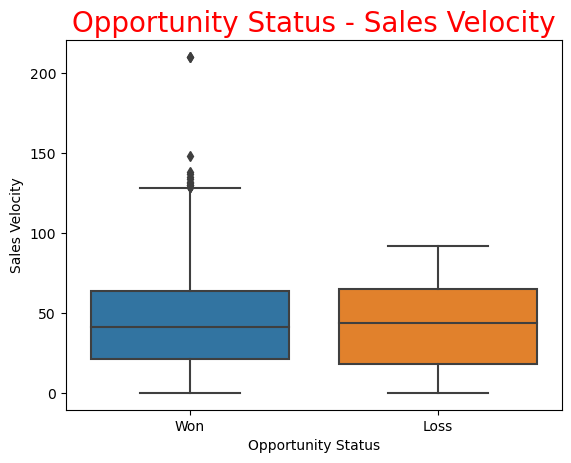

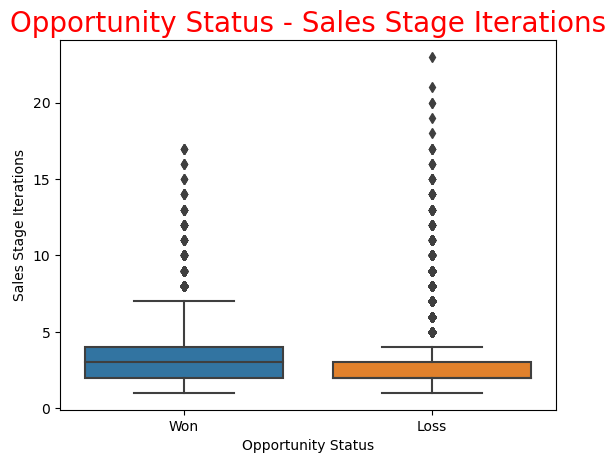

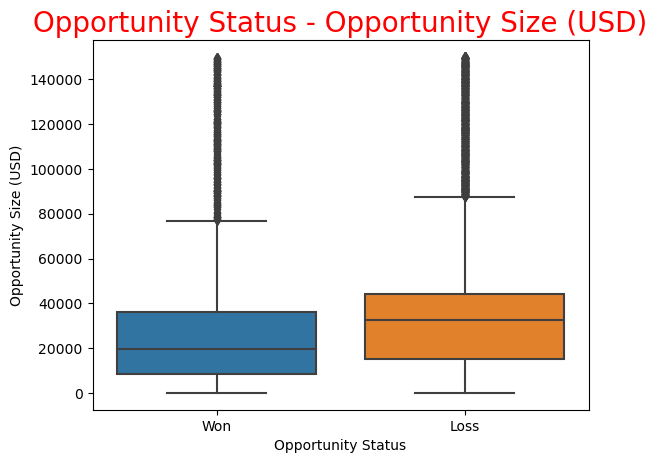

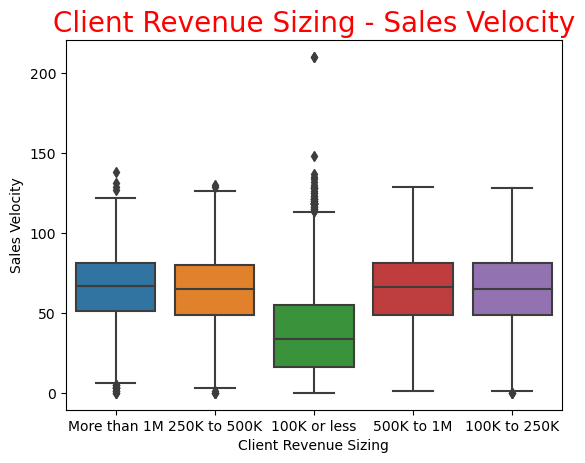

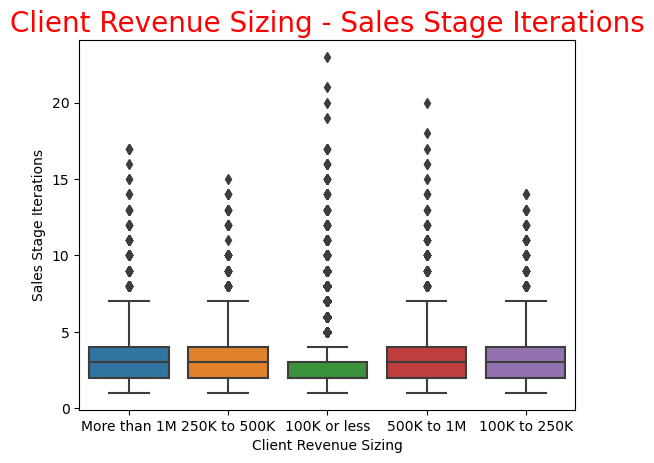

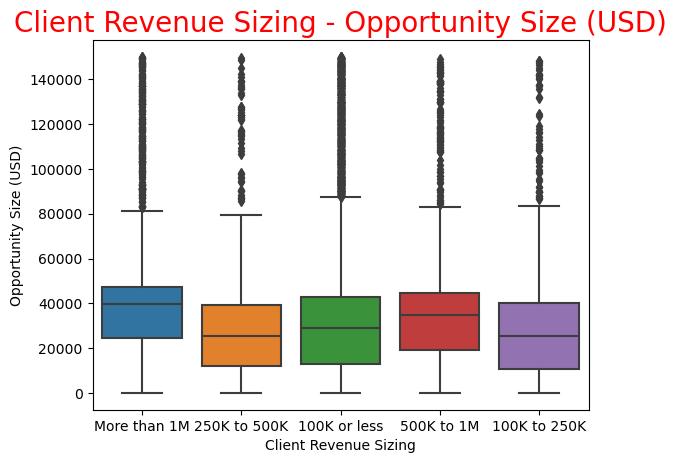

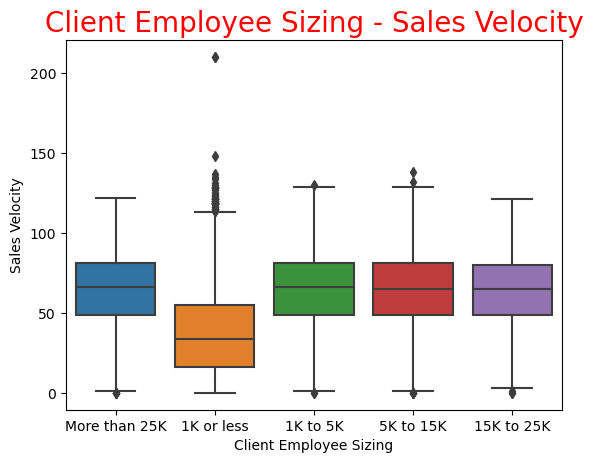

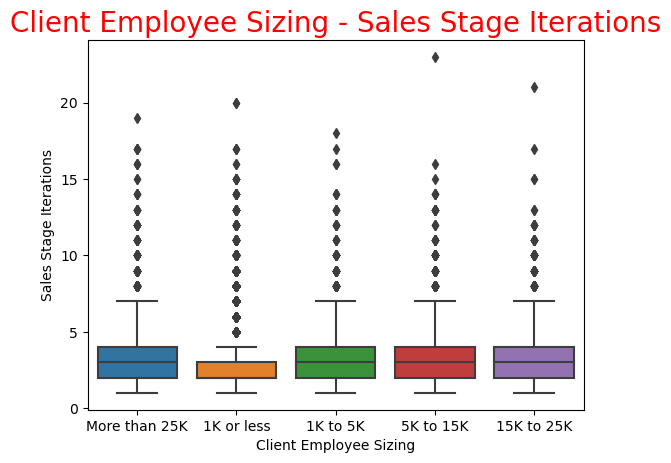

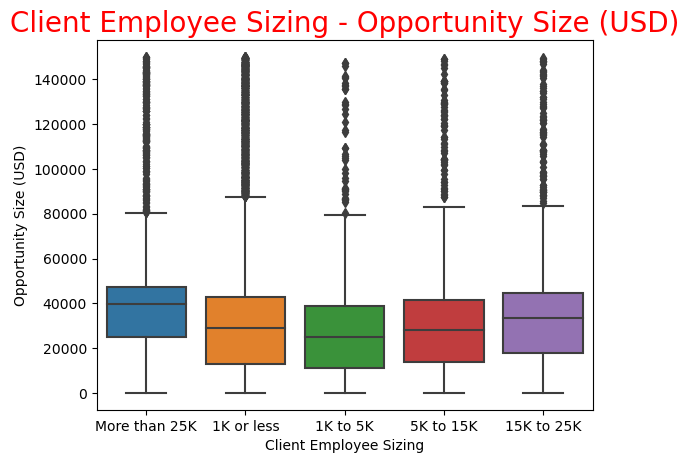

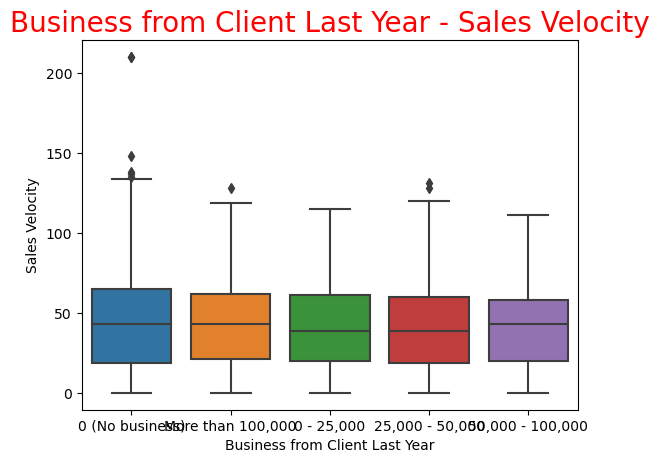

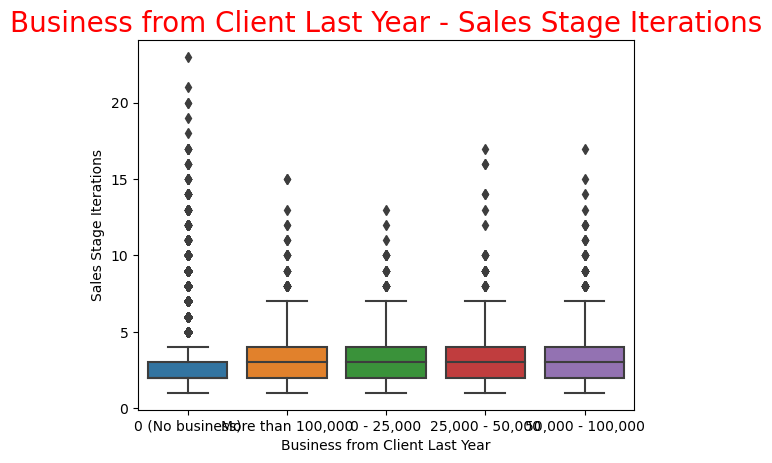

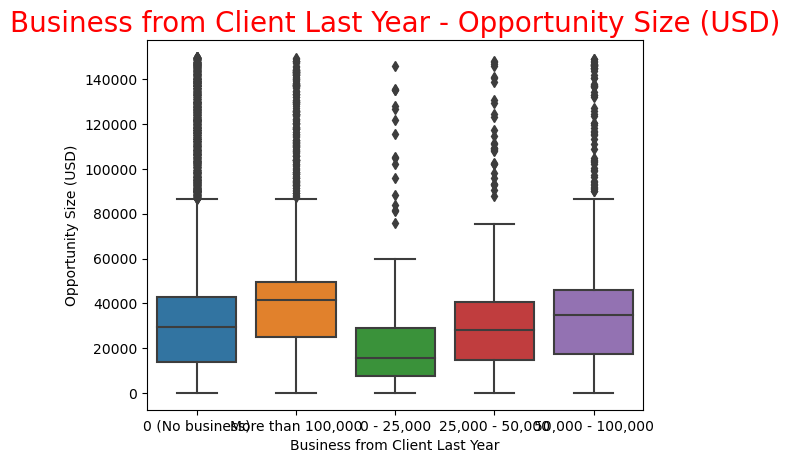

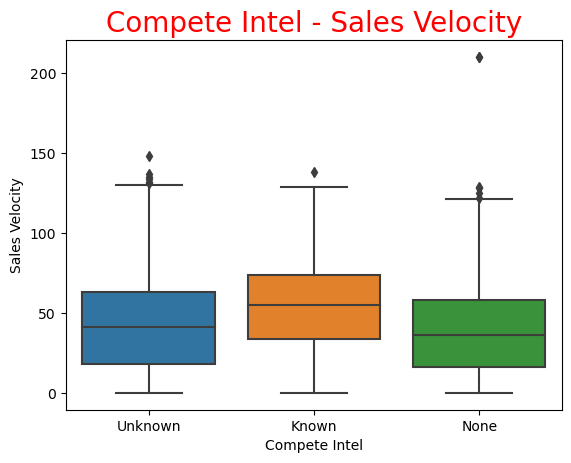

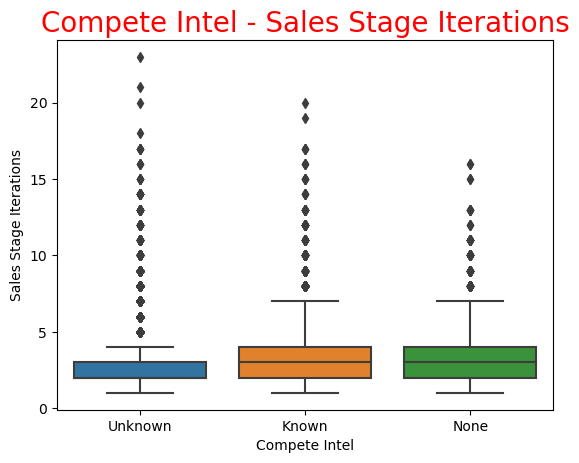

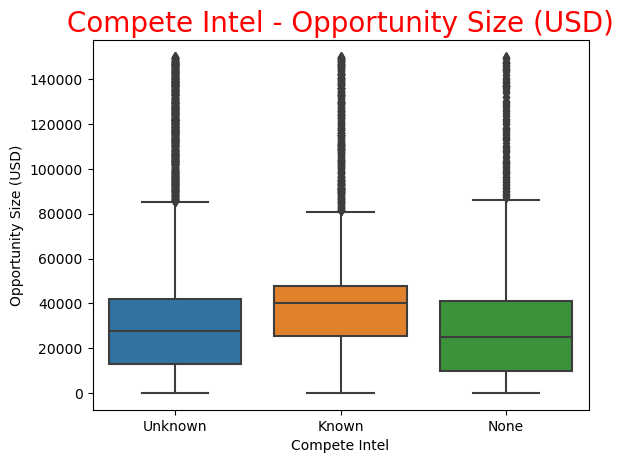

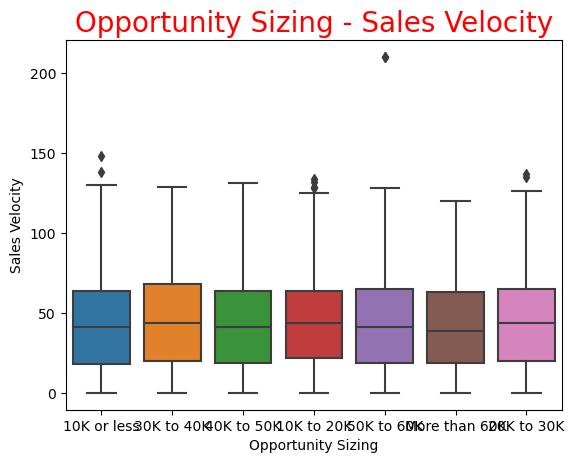

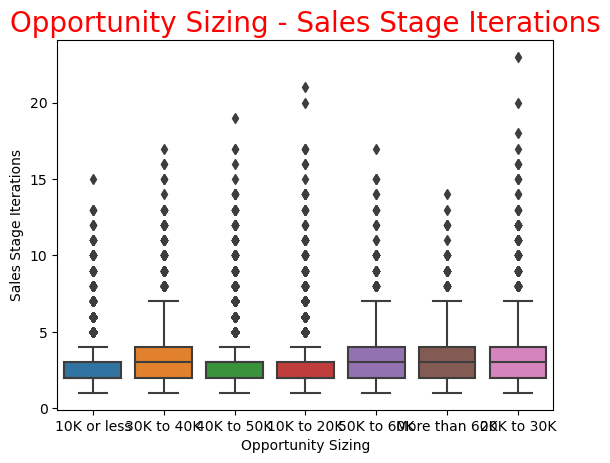

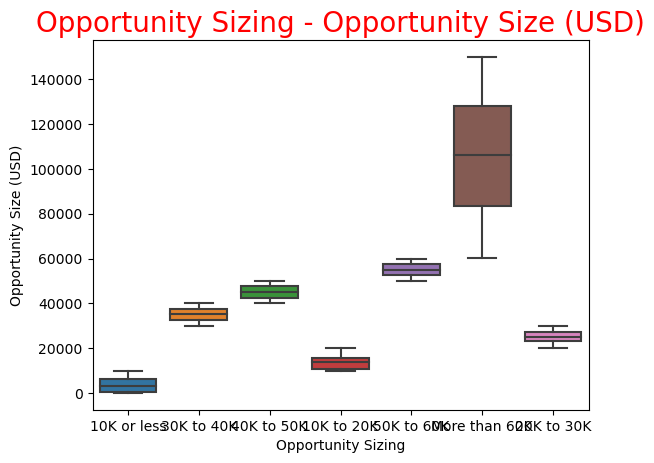

In [16]:
for categorical_variable in categorical_variables:
    for numerical_variable in numerical_variables:
        sns.boxplot(data=df, x=categorical_variable, y=numerical_variable)
        plt.title(f'{categorical_variable} - {numerical_variable}', fontsize=20, color='red')
        plt.show()

- Despite small number of clients in "Legacy Modernization" sector, the opportunity size in this sector is higher than the others: "ERP Implementation", "Analytics", "Technical Business Solutions"
- Mumbai, Delhi, Bengaluru have smaller sales stage iterations than Pune, Chennai, Kolkata, Hyderabad.
- Marketing, Enterprise Sellers, Partners have higher sales velocity than Tele Sales and Online Leads
- Enterprise Sellers has high Sales Stage Iterations than the others.
- Marketing and Partners have higher Opportunity Size, while Tele Sales has lower Opportunity Size than the others.
- Converted leads (won) has more Sales Stage Iterations than unconverted leads (Loss).
- Unconverted leads (loss) has higher Opportunity Size than Converted leads (won).
- Small revenue sizing clients have lower Sales Stage Iterations and Sales Velocity. But the opportunity size of them is not less than the others.
- Small Client Employee Sizing also have lower Sales Stage Iterations and Sales Velocity. But the opportunity size of them is not less than the others.
- Information from competitor will have more opportunity size.

#### Categorical - Categorical Analysis

In [17]:
# Loop through every categorical variables and group with target variable
for variable in categorical_variables:
    print(df.groupby([variable])['Opportunity Status'].value_counts(normalize=True))
    print('---------------------------------------------------------------------------')

Technology\nPrimary           Opportunity Status
Analytics                     Loss                  0.736655
                              Won                   0.263345
ERP Implementation            Loss                  0.766533
                              Won                   0.233467
Legacy Modernization          Loss                  0.878489
                              Won                   0.121511
Technical Business Solutions  Loss                  0.785910
                              Won                   0.214090
Name: Opportunity Status, dtype: float64
---------------------------------------------------------------------------
City       Opportunity Status
Bengaluru  Loss                  0.782873
           Won                   0.217127
Chennai    Loss                  0.781845
           Won                   0.218155
Delhi      Loss                  0.772553
           Won                   0.227447
Hyderabad  Loss                  0.781088
           Won        

- "Legacy Modernization" has a higher chance to loss compared to the others
- "Mumbai" is a city that has the highest chance to win while "Pune" is a very challenging city that has the highest chance to loss
- "Enterprise Sellers" is the best medium with highest win rate. On the other hand, "Online Leads" seems to be not a good medium with lowest win rate.
- Clients that have very high revenue (more than 1M) or Client Employee Sizing (more than 25k) have lower win rate than the others.
- Clients did not spend money for TechnoServe (0 - No business) have a very high chance to loss.
- Clients with information on the competitor (known) have higher chance to loss.
- Clients with opportunity sizing 10k or less have the highest chance to win while 40k to 50k have highest chance to loss.

In [18]:
categorical_variables

['Technology\nPrimary',
 'City',
 'B2B Sales Medium',
 'Opportunity Status',
 'Client Revenue Sizing',
 'Client Employee Sizing',
 'Business from Client Last Year',
 'Compete Intel',
 'Opportunity Sizing']

### Multivariate Analysis

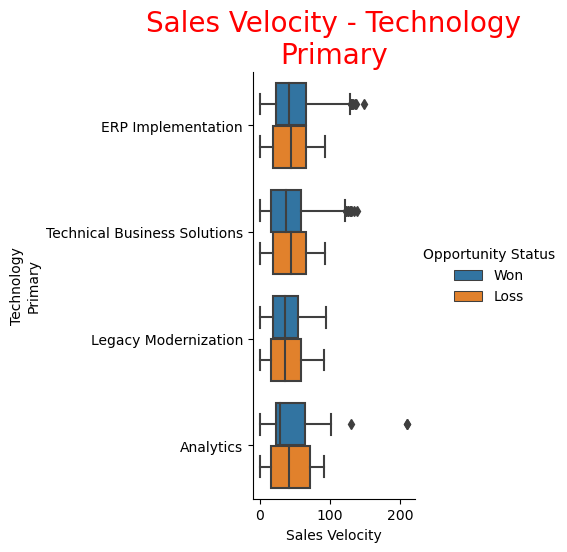

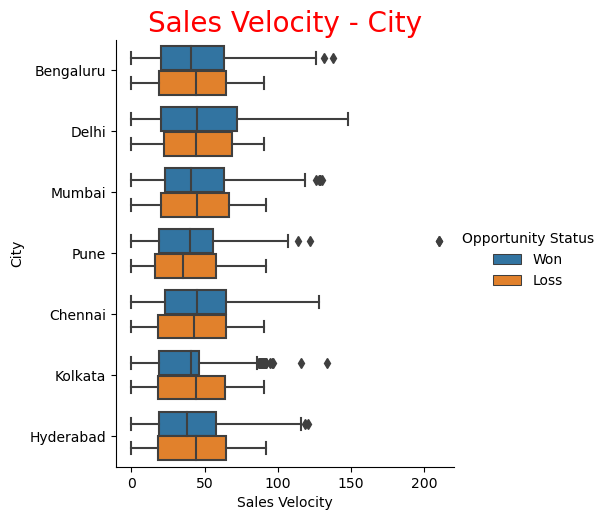

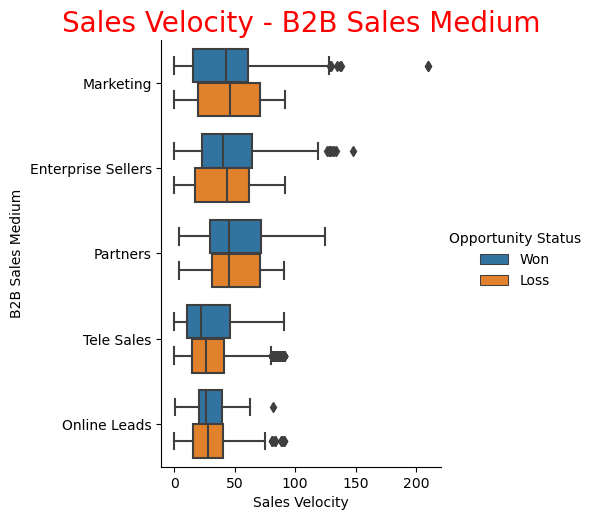

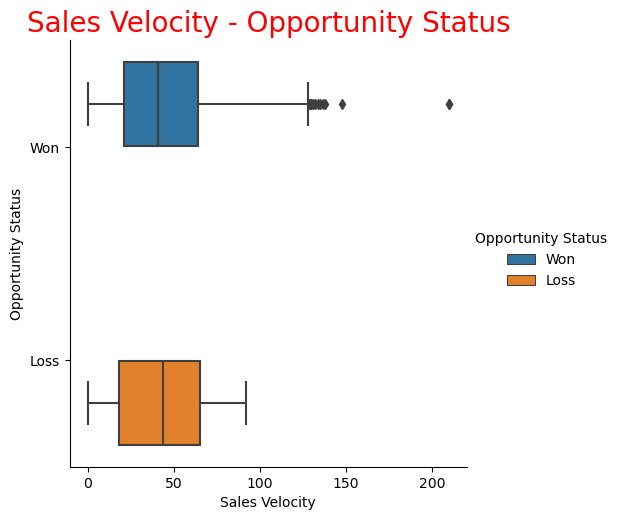

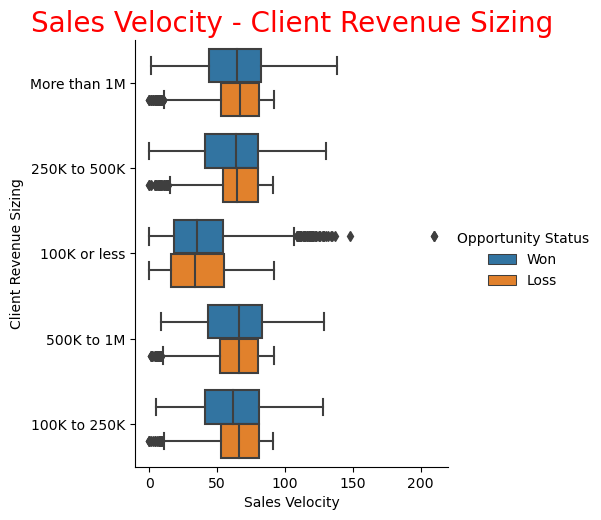

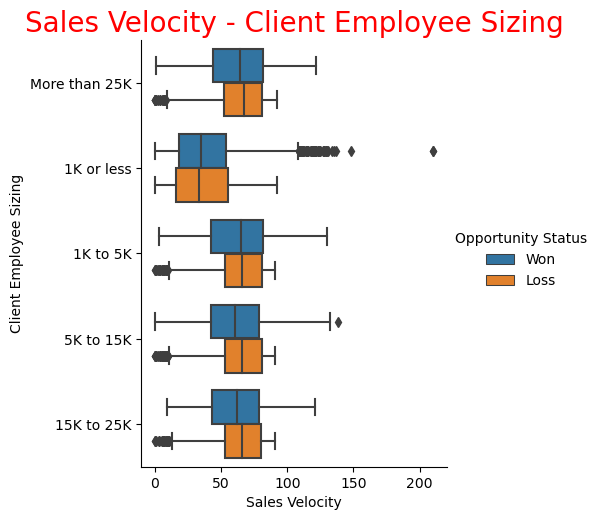

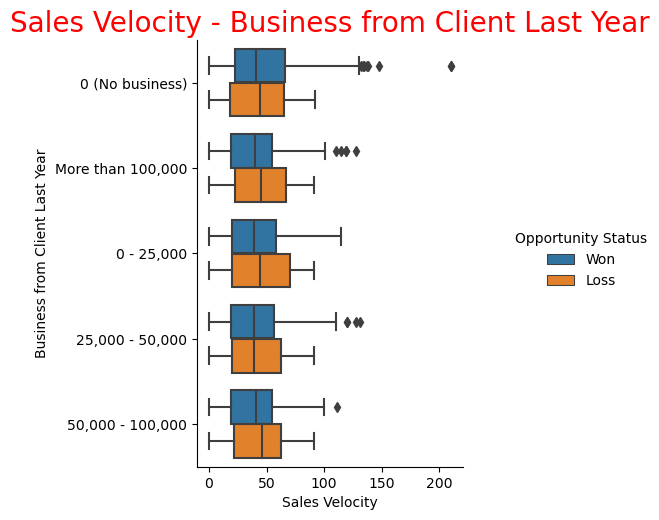

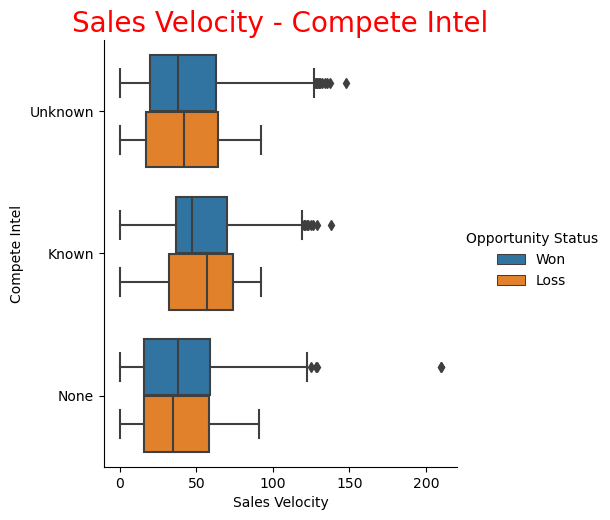

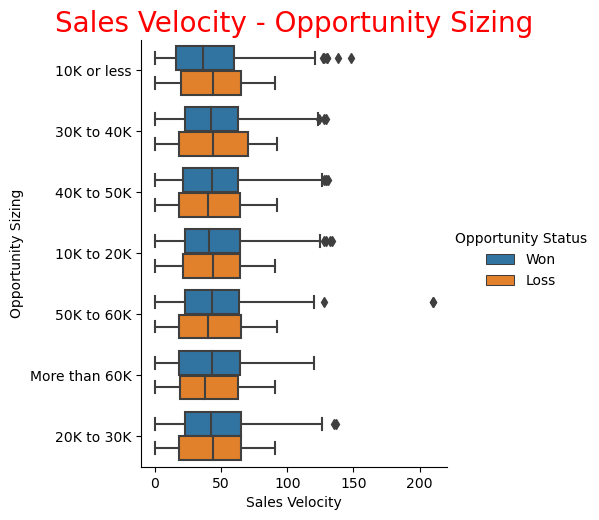

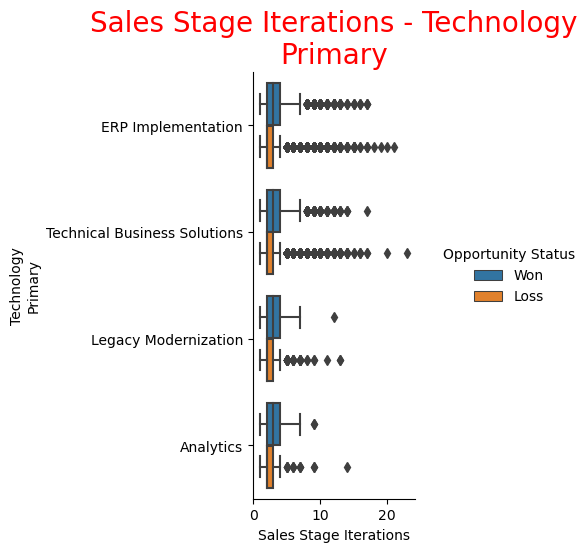

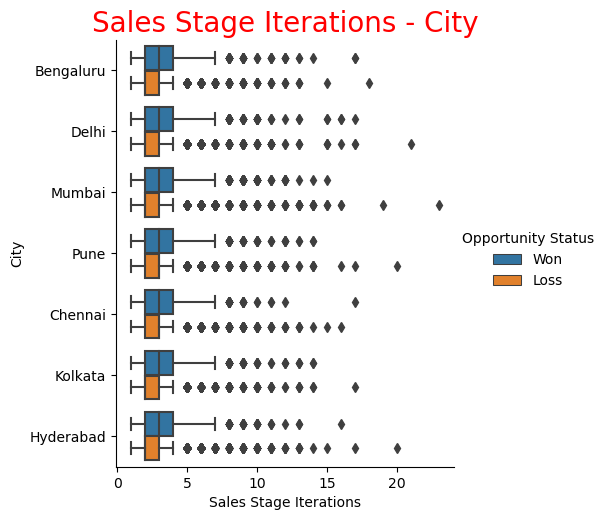

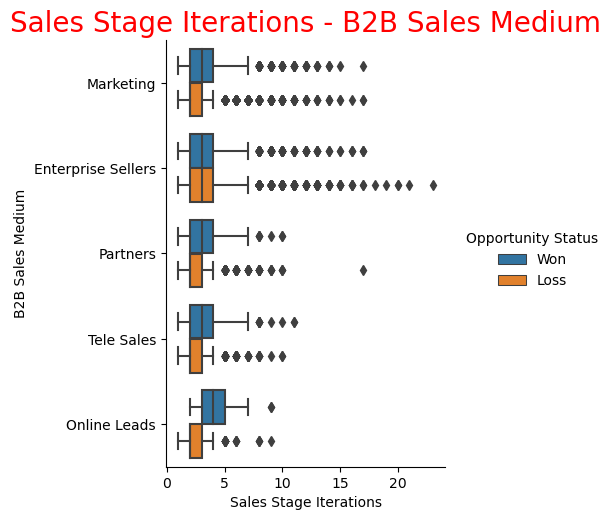

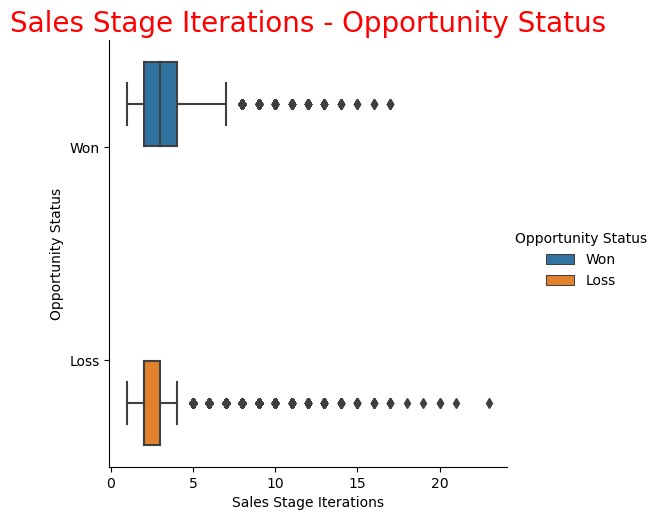

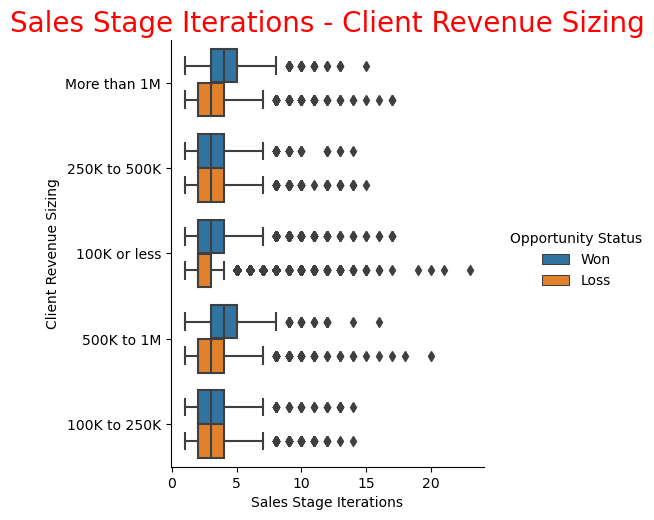

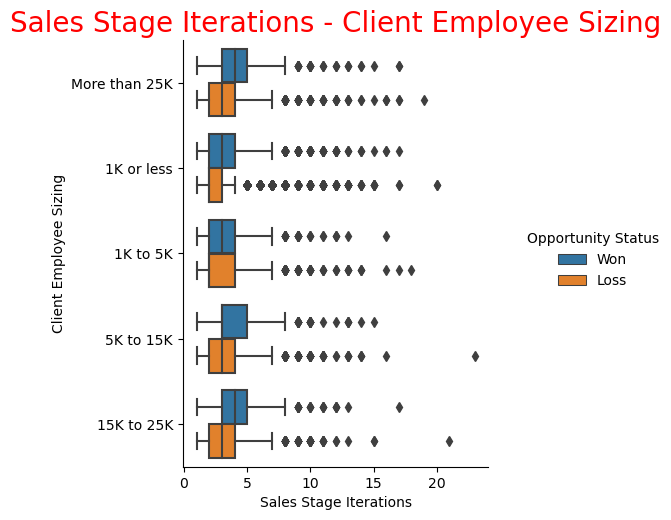

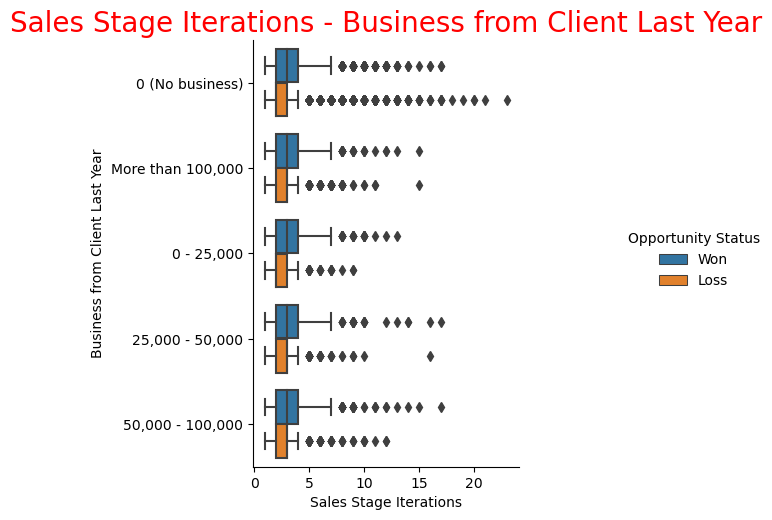

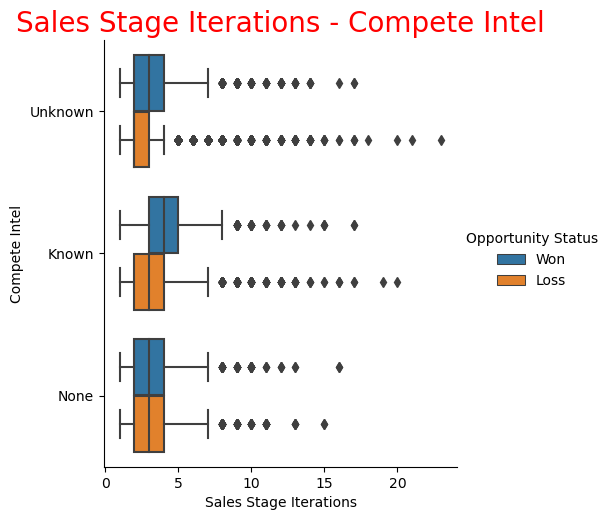

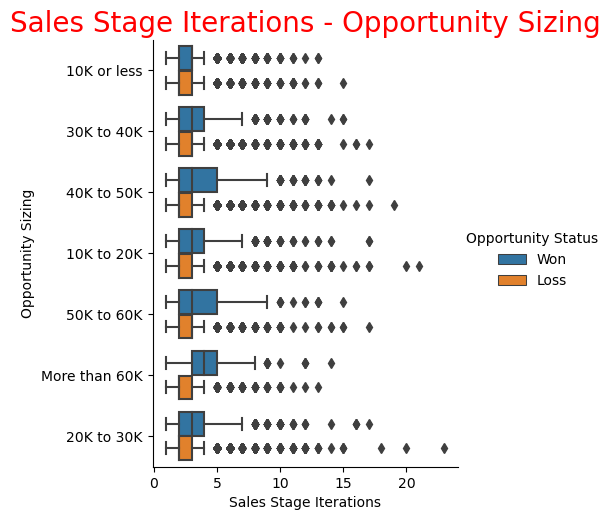

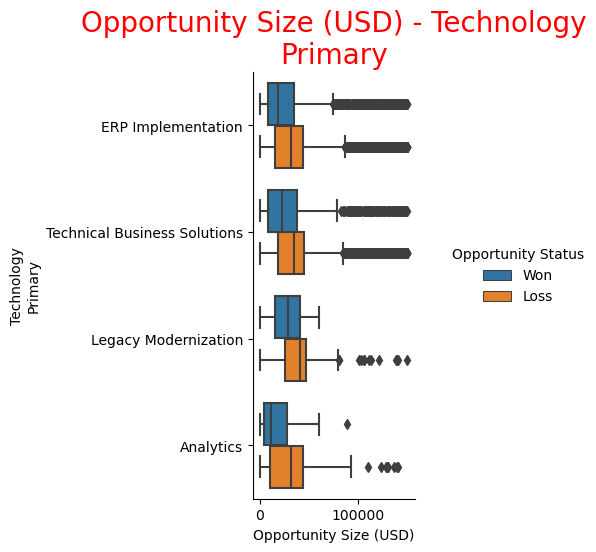

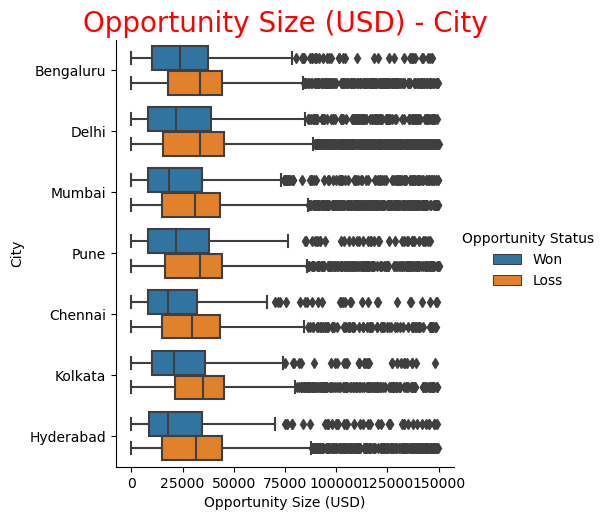

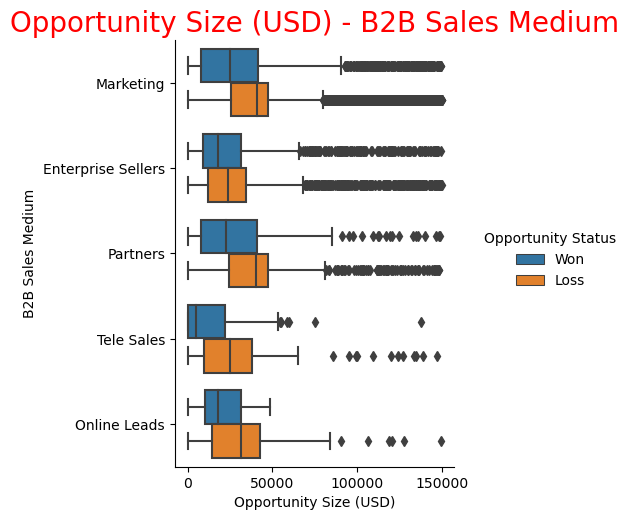

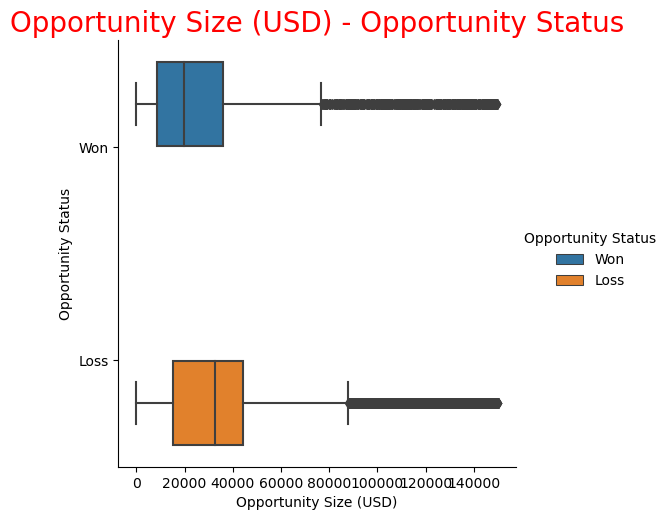

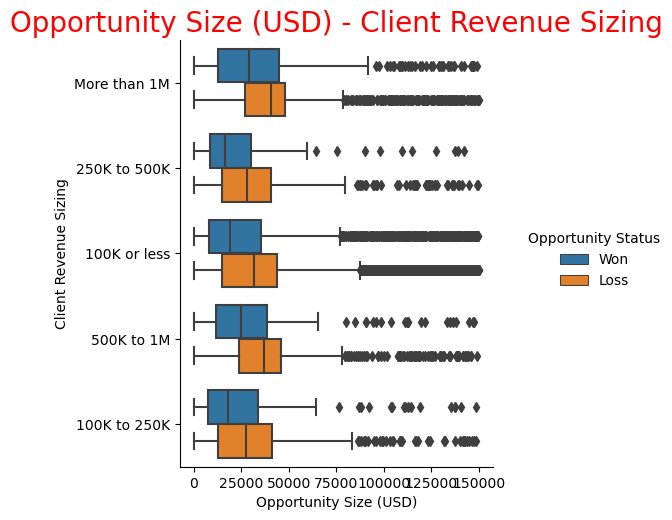

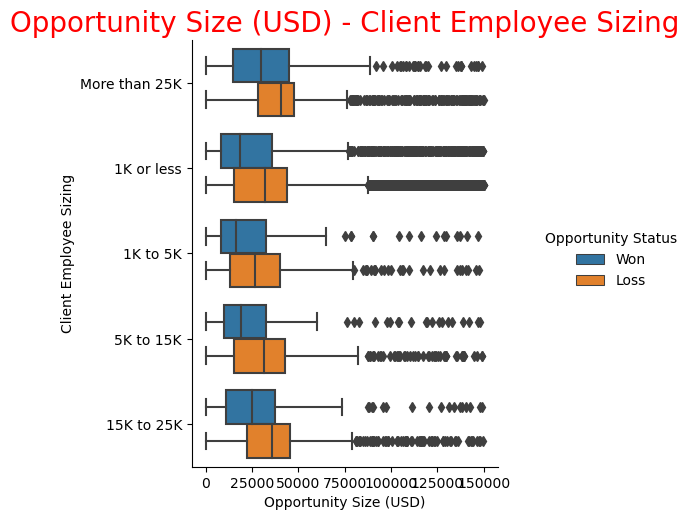

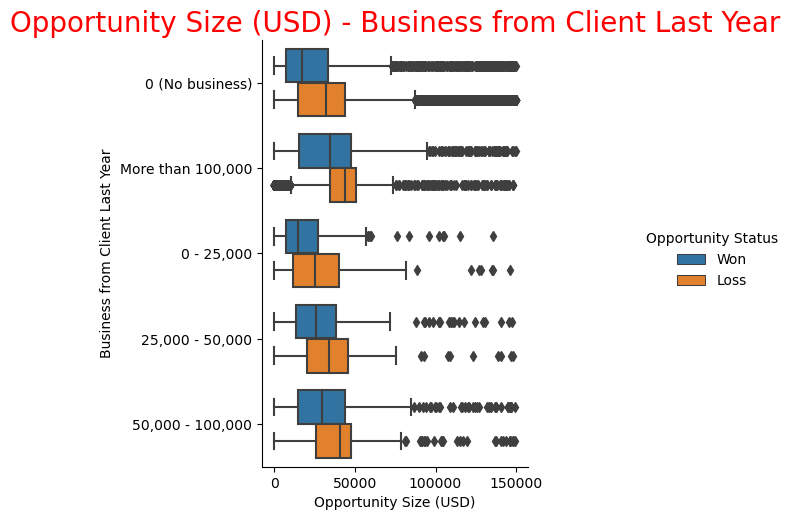

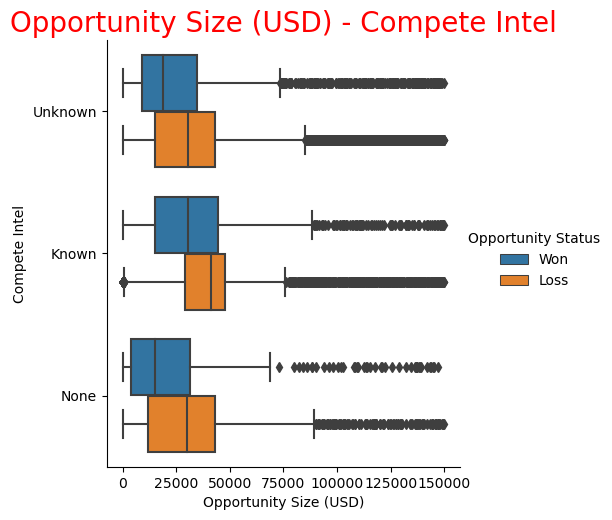

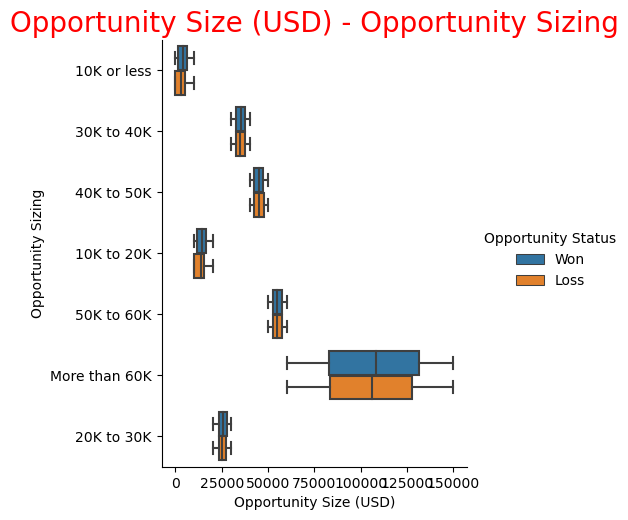

In [19]:
# Loop through numerical variables and categorical variables to have bigger view 
for numerical_variable in numerical_variables:
    for categorical_variable in categorical_variables:      
        sns.catplot(data=df, x=numerical_variable, y=categorical_variable, hue="Opportunity Status", kind="box")
        plt.title(numerical_variable + ' - ' + categorical_variable, fontsize=20, color='red')
        plt.show()

# Data Preparation

#### Remove "Opportunity Size (USD)"

In [20]:
df.drop(['Opportunity Size (USD)'], axis=1, inplace=True)

In [21]:
# Check data
df.head()

Opportunity ID           Technology\nPrimary       City    B2B Sales Medium  \
0      N00000001            ERP Implementation  Bengaluru           Marketing   
1      N00000002            ERP Implementation      Delhi  Enterprise Sellers   
2      N00000003  Technical Business Solutions      Delhi  Enterprise Sellers   
3      N00000004  Technical Business Solutions     Mumbai  Enterprise Sellers   
4      N00000005            ERP Implementation      Delhi  Enterprise Sellers   

   Sales Velocity Opportunity Status  Sales Stage Iterations  \
0              76                Won                      13   
1              63               Loss                       2   
2              24                Won                       7   
3              16               Loss                       5   
4              69               Loss                      11   

  Client Revenue Sizing Client Employee Sizing Business from Client Last Year  \
0          More than 1M          More than 25K                0 (No business)   
1          250K to 500K          More than 25K                0 (No business)   
2          100K or less             1K or less                0 (No business)   
3          100K or less             1K or less                0 (No business)   
4          100K or less             1K or less                0 (No business)   

  Compete Intel Opportunity Sizing  
0       Unknown        10K or less  
1       Unknown        10K or less  
2       Unknown        10K or less  
3         Known        10K or less  
4       Unknown         30K to 40K

#### Binning "Sales Stage Iterations"

In [22]:
df['Sales Stage Iterations'].describe()

count    78025.000000
mean         2.955732
std          1.497242
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         23.000000
Name: Sales Stage Iterations, dtype: float64

In [23]:
bins = [0, 2, 3, 23]
df['Sales Stage Iterations'] = pd.cut(df['Sales Stage Iterations'], bins)
df['Sales Stage Iterations']

0        (3, 23]
1         (0, 2]
2        (3, 23]
3        (3, 23]
4        (3, 23]
          ...   
78020     (0, 2]
78021     (0, 2]
78022     (0, 2]
78023     (0, 2]
78024     (0, 2]
Name: Sales Stage Iterations, Length: 78025, dtype: category
Categories (3, interval[int64, right]): [(0, 2] < (2, 3] < (3, 23]]

#### Converting some binary variables (Yes/No) to 0/1

In [24]:
# Opportunity Status
df['Opportunity Status'] = df['Opportunity Status'].map({'Won': 1, "Loss": 0})

# Compete Inter we will merge unknow to none
df['Compete Intel'] = df['Compete Intel'].map({'Known': 1, "Unknown": 0, "None": 0})


In [25]:
# Check
df[['Opportunity Status', 'Compete Intel']].head()

Opportunity Status  Compete Intel
0                   1              0
1                   0              0
2                   1              0
3                   0              1
4                   0              0

In [26]:
df['Opportunity Status'].mean()

0.22591477090676065

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [27]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Client Revenue Sizing','Client Employee Sizing', 'Business from Client Last Year', 'Opportunity Sizing', 'Sales Stage Iterations']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [28]:
df.head()

Opportunity ID           Technology\nPrimary       City    B2B Sales Medium  \
0      N00000001            ERP Implementation  Bengaluru           Marketing   
1      N00000002            ERP Implementation      Delhi  Enterprise Sellers   
2      N00000003  Technical Business Solutions      Delhi  Enterprise Sellers   
3      N00000004  Technical Business Solutions     Mumbai  Enterprise Sellers   
4      N00000005            ERP Implementation      Delhi  Enterprise Sellers   

   Sales Velocity  Opportunity Status Sales Stage Iterations  \
0              76                   1                (3, 23]   
1              63                   0                 (0, 2]   
2              24                   1                (3, 23]   
3              16                   0                (3, 23]   
4              69                   0                (3, 23]   

  Client Revenue Sizing Client Employee Sizing Business from Client Last Year  \
0          More than 1M          More than 25K                0 (No business)   
1          250K to 500K          More than 25K                0 (No business)   
2          100K or less             1K or less                0 (No business)   
3          100K or less             1K or less                0 (No business)   
4          100K or less             1K or less                0 (No business)   

   ...  Business from Client Last Year_50,000 - 100,000  \
0  ...                                                0   
1  ...                                                0   
2  ...                                                0   
3  ...                                                0   
4  ...                                                0   

  Business from Client Last Year_More than 100,000  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Opportunity Sizing_10K to 20K  Opportunity Sizing_20K to 30K  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Opportunity Sizing_30K to 40K  Opportunity Sizing_40K to 50K  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              1                              0   

   Opportunity Sizing_50K to 60K  Opportunity Sizing_More than 60K  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   Sales Stage Iterations_(2, 3]  Sales Stage Iterations_(3, 23]  
0                              0                               1  
1                              0                               0  
2                              0                               1  
3                              0                               1  
4                              0                               1  

[5 rows x 45 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Opportunity ID                                    78025 non-null  object  
 1   Technology
Primary                                78025 non-null  object  
 2   City                                              78025 non-null  object  
 3   B2B Sales Medium                                  78025 non-null  object  
 4   Sales Velocity                                    78025 non-null  int64   
 5   Opportunity Status                                78025 non-null  int64   
 6   Sales Stage Iterations                            78025 non-null  category
 7   Client Revenue Sizing                             78025 non-null  object  
 8   Client Employee Sizing                            78025 non-null  object  
 9   Busine

#### Dropping the repeated variables

In [30]:
# We have created dummies for the below variables, so we can drop them
df.drop(['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Client Revenue Sizing','Client Employee Sizing', 'Business from Client Last Year', 'Opportunity Sizing', 'Sales Stage Iterations'], axis=1, inplace=True)

In [31]:
df.head()

Opportunity ID  Sales Velocity  Opportunity Status  Compete Intel  \
0      N00000001              76                   1              0   
1      N00000002              63                   0              0   
2      N00000003              24                   1              0   
3      N00000004              16                   0              1   
4      N00000005              69                   0              0   

   Technology\nPrimary_ERP Implementation  \
0                                       1   
1                                       1   
2                                       0   
3                                       0   
4                                       1   

   Technology\nPrimary_Legacy Modernization  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Technology\nPrimary_Technical Business Solutions  City_Chennai  City_Delhi  \
0                                                 0             0           0   
1                                                 0             0           1   
2                                                 1             0           1   
3                                                 1             0           0   
4                                                 0             0           1   

   City_Hyderabad  ...  Business from Client Last Year_50,000 - 100,000  \
0               0  ...                                                0   
1               0  ...                                                0   
2               0  ...                                                0   
3               0  ...                                                0   
4               0  ...                                                0   

   Business from Client Last Year_More than 100,000  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Opportunity Sizing_10K to 20K  Opportunity Sizing_20K to 30K  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Opportunity Sizing_30K to 40K  Opportunity Sizing_40K to 50K  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              1                              0   

   Opportunity Sizing_50K to 60K  Opportunity Sizing_More than 60K  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   Sales Stage Iterations_(2, 3]  Sales Stage Iterations_(3, 23]  
0                              0                               1  
1                              0                               0  
2                              0                               1  
3                              0                               1  
4                              0                               1  

[5 rows x 37 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Opportunity ID                                    78025 non-null  object
 1   Sales Velocity                                    78025 non-null  int64 
 2   Opportunity Status                                78025 non-null  int64 
 3   Compete Intel                                     78025 non-null  int64 
 4   Technology
Primary_ERP Implementation             78025 non-null  uint8 
 5   Technology
Primary_Legacy Modernization           78025 non-null  uint8 
 6   Technology
Primary_Technical Business Solutions   78025 non-null  uint8 
 7   City_Chennai                                      78025 non-null  uint8 
 8   City_Delhi                                        78025 non-null  uint8 
 9   City_Hyderabad              

## Test-Train Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Putting feature variable to X
X = df.drop(['Opportunity Status','Opportunity ID'], axis=1)

X.head()

Sales Velocity  Compete Intel  Technology\nPrimary_ERP Implementation  \
0              76              0                                       1   
1              63              0                                       1   
2              24              0                                       0   
3              16              1                                       0   
4              69              0                                       1   

   Technology\nPrimary_Legacy Modernization  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Technology\nPrimary_Technical Business Solutions  City_Chennai  City_Delhi  \
0                                                 0             0           0   
1                                                 0             0           1   
2                                                 1             0           1   
3                                                 1             0           0   
4                                                 0             0           1   

   City_Hyderabad  City_Kolkata  City_Mumbai  ...  \
0               0             0            0  ...   
1               0             0            0  ...   
2               0             0            0  ...   
3               0             0            1  ...   
4               0             0            0  ...   

   Business from Client Last Year_50,000 - 100,000  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Business from Client Last Year_More than 100,000  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Opportunity Sizing_10K to 20K  Opportunity Sizing_20K to 30K  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Opportunity Sizing_30K to 40K  Opportunity Sizing_40K to 50K  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              1                              0   

   Opportunity Sizing_50K to 60K  Opportunity Sizing_More than 60K  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   

   Sales Stage Iterations_(2, 3]  Sales Stage Iterations_(3, 23]  
0                              0                               1  
1                              0                               0  
2                              0                               1  
3                              0                               1  
4                              0                               1  

[5 rows x 35 columns]

In [35]:
# Putting response variable to y
y = df['Opportunity Status']

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Opportunity Status, dtype: int64

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()


X_train[['Sales Velocity']] = scaler.fit_transform(X_train[['Sales Velocity']])

X_train['Sales Velocity'].head()

45056    0.014286
11621    0.228571
44590    0.047619
73734    0.080952
61710    0.214286
Name: Sales Velocity, dtype: float64

## Correlation

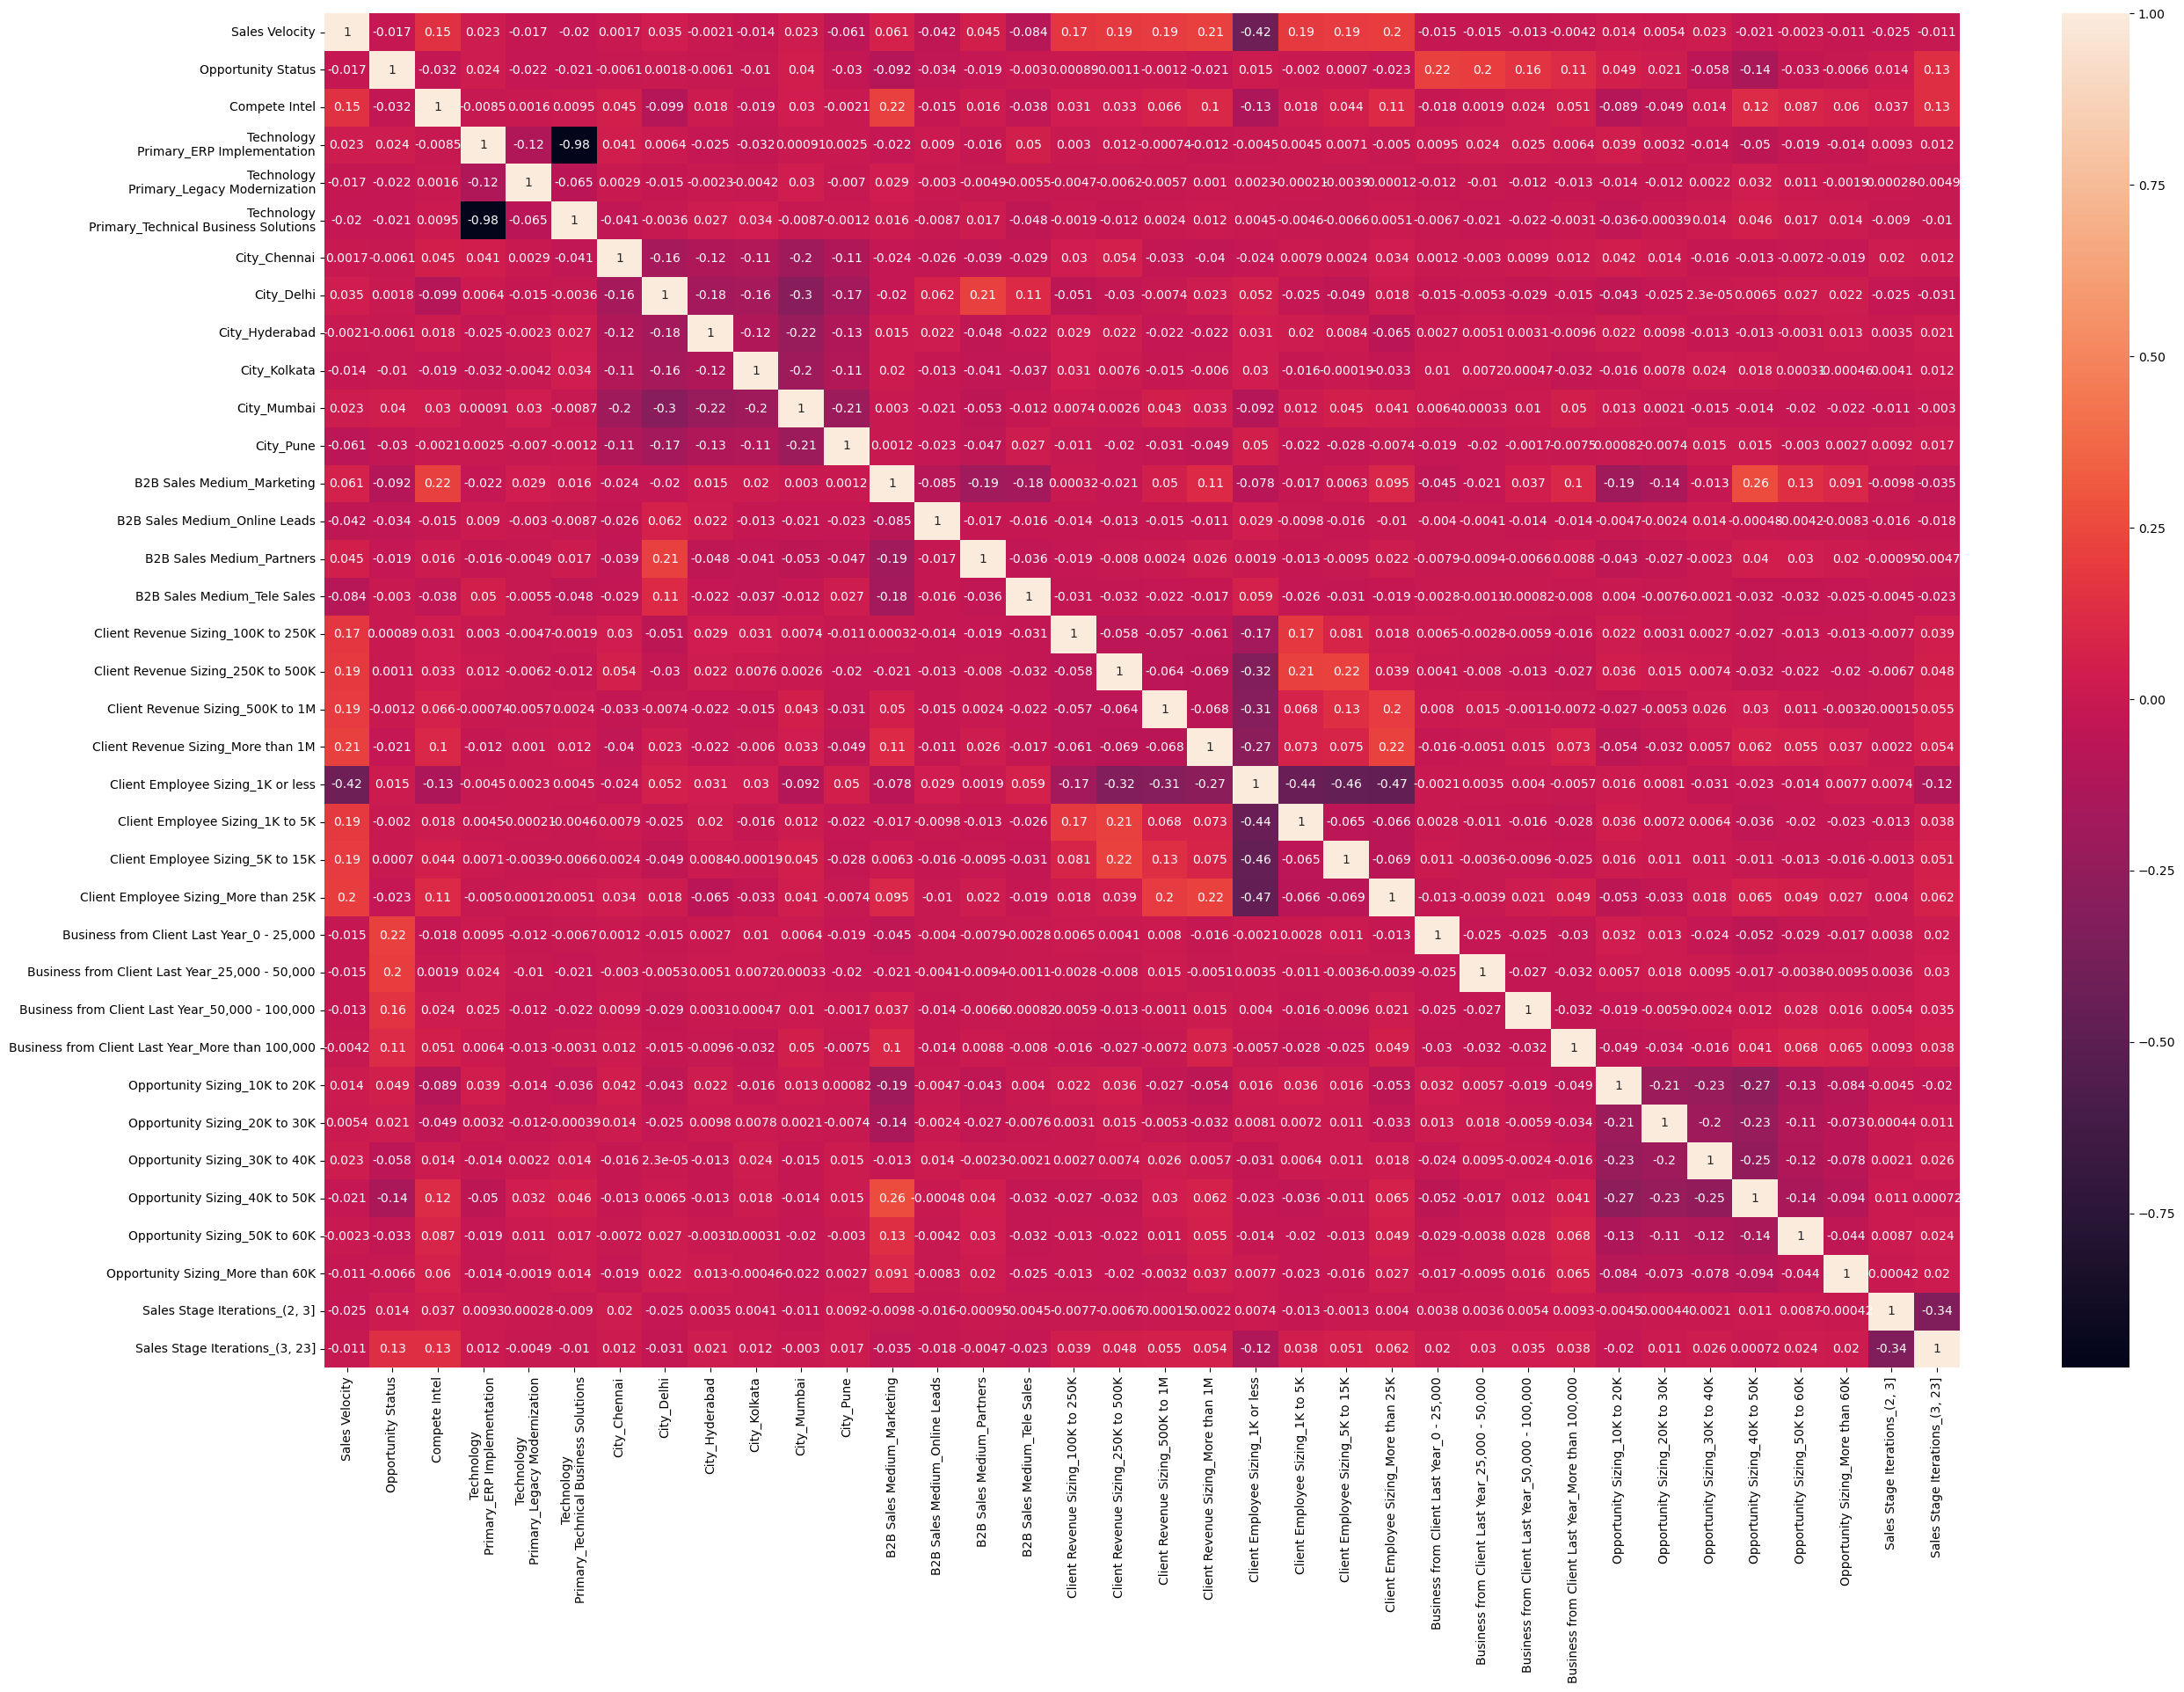

In [39]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [40]:
X_test = X_test.drop(['Technology\nPrimary_ERP Implementation','Client Employee Sizing_1K or less'], 1)
X_train = X_train.drop(['Technology\nPrimary_ERP Implementation','Client Employee Sizing_1K or less'], 1)

#### Checking the Correlation Matrix

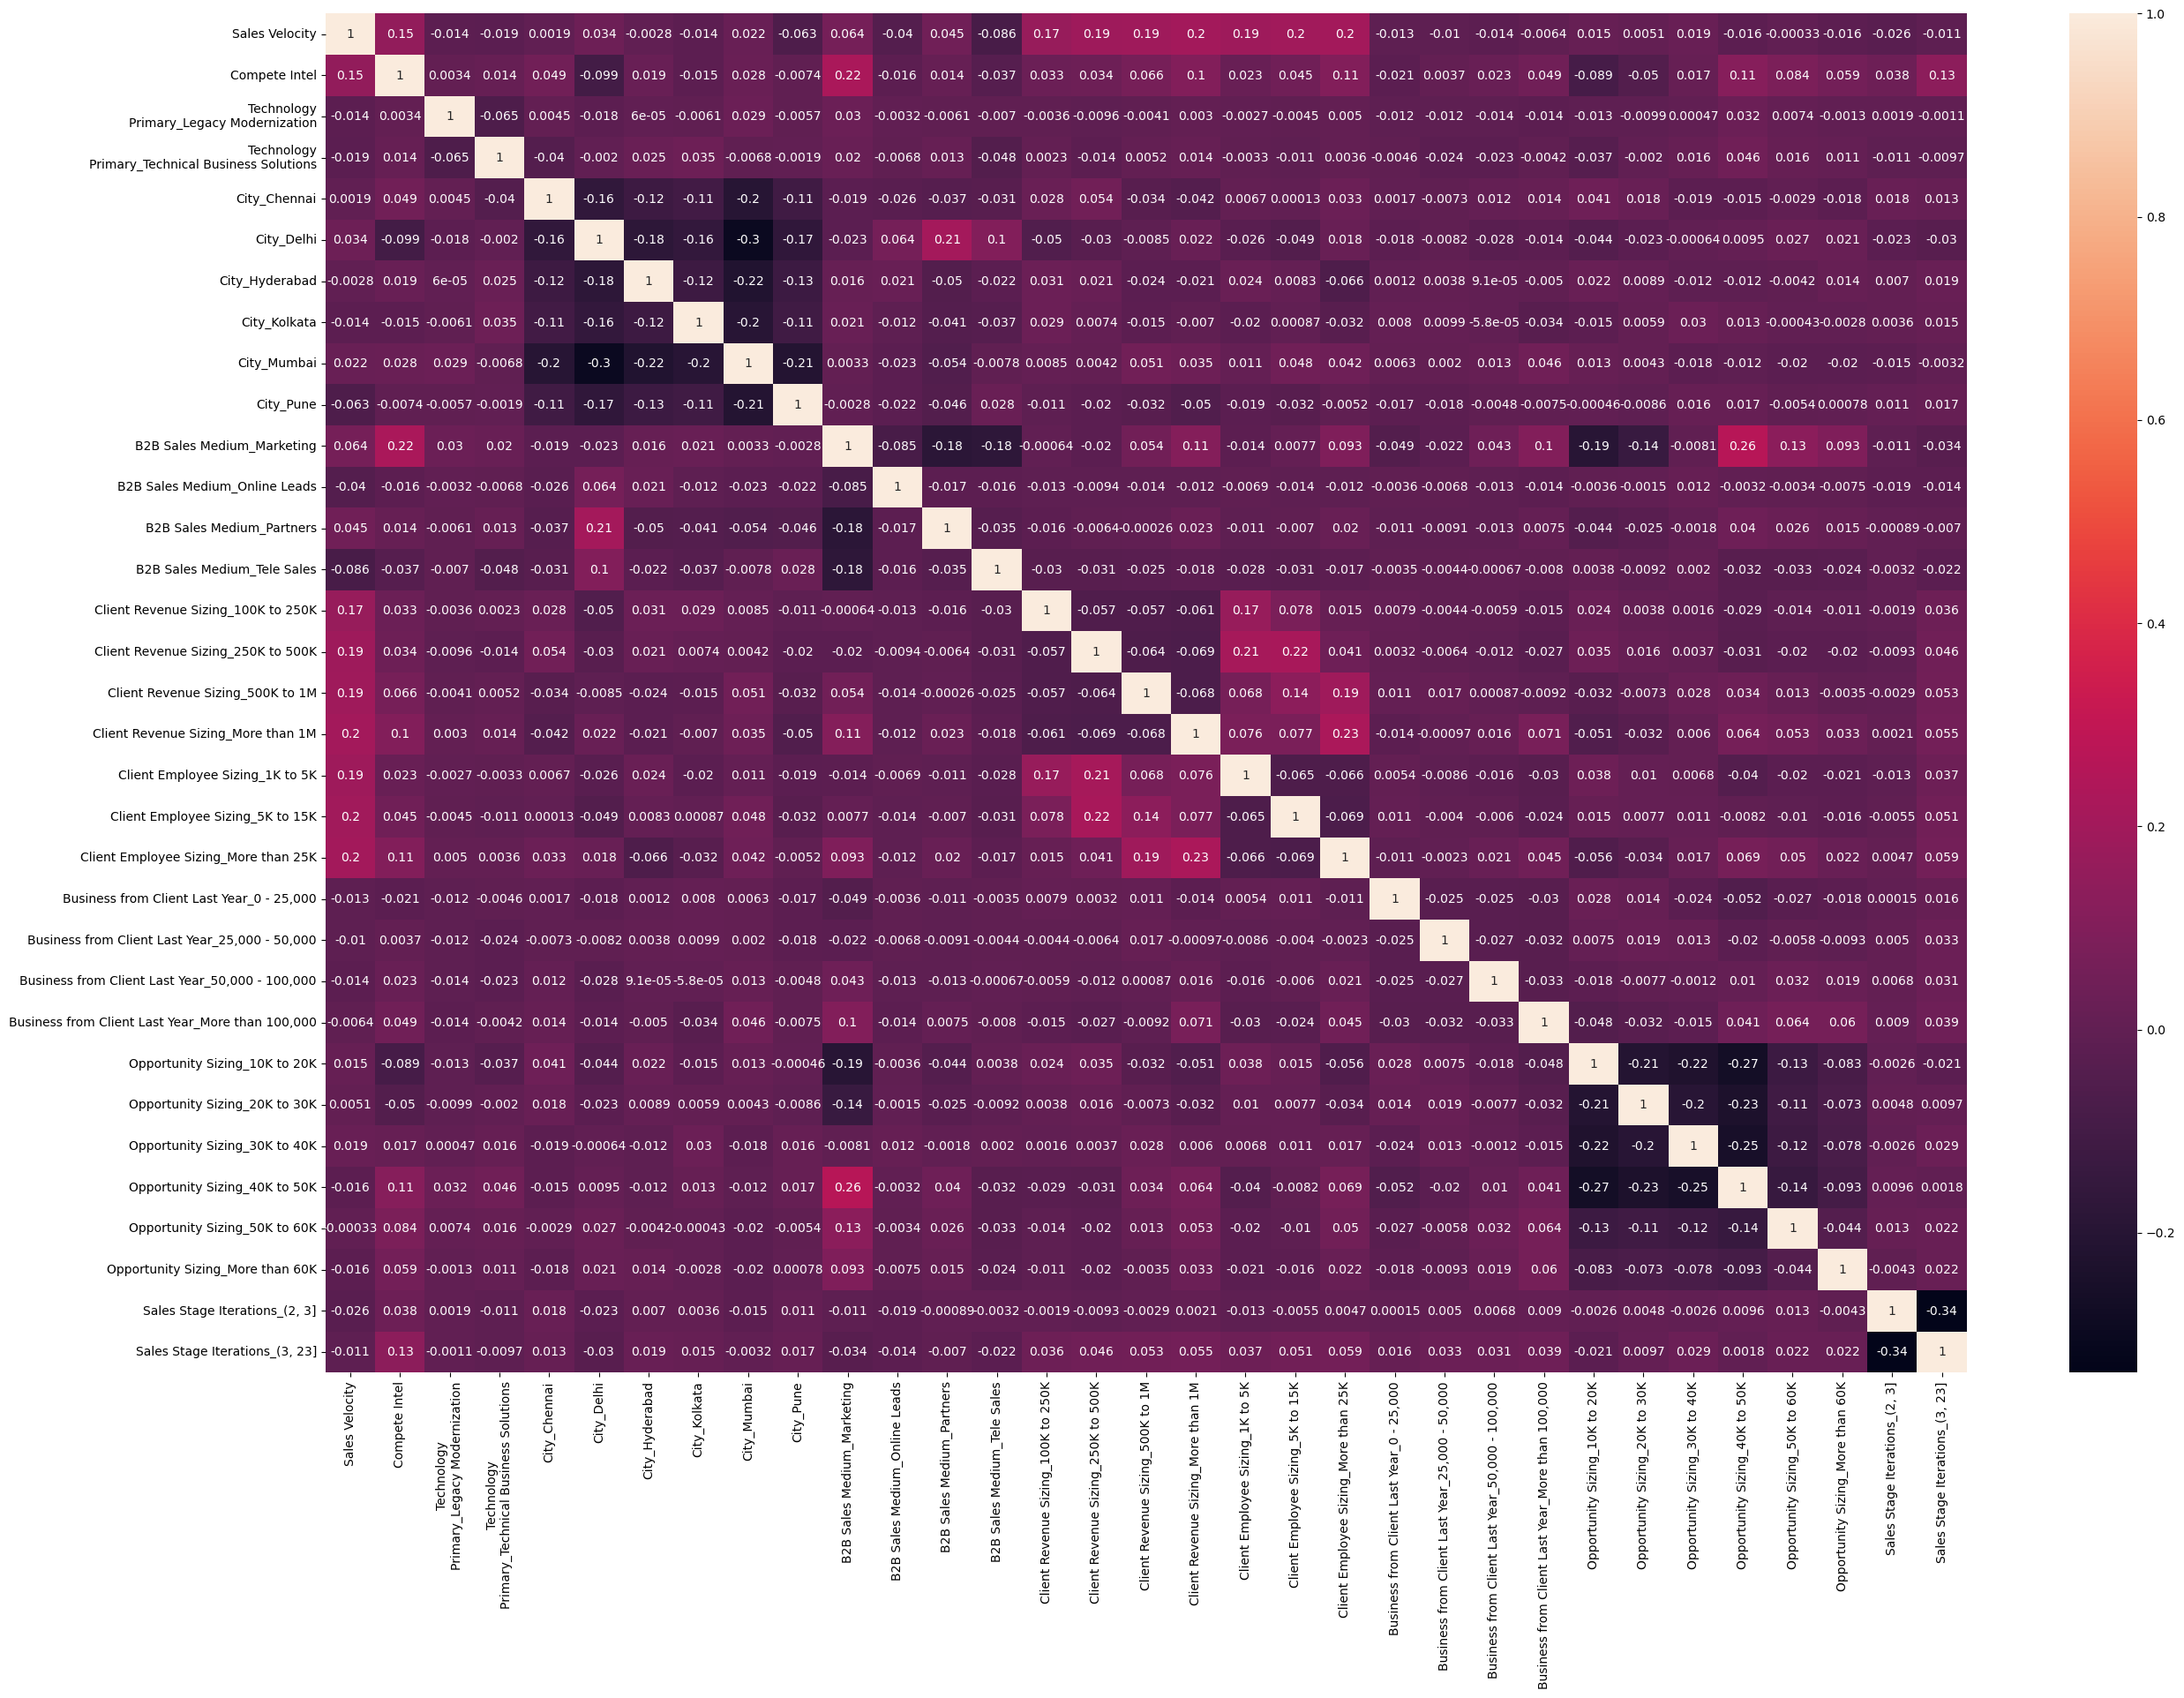

In [41]:
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building

In [42]:
import statsmodels.api as sm

In [43]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54583
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23901.
Date:                Sun, 07 Jan 2024   Deviance:                       47802.
Time:                        15:30:05   Pearson chi2:                 5.26e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1749
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.9427      0.048    -19.567      0.000      -1.037      -0.848
Sales Velocity                                       0.1958      0.103      1.910      0.056      -0.005       0.397
Compete Intel                                       -0.1355      0.036     -3.765      0.000      -0.206      -0.065
Technology
Primary_Legacy Modernization             -0.3284      0.161     -2.038      0.042      -0.644      -0.013
Technology
Primary_Technical Business Solutions      0.0436      0.024      1.783      0.075      -0.004       0.092
City_Chennai                                        -0.1159      0.051     -2.269      0.023      -0.216      -0.016
City_Delhi                                           0.2513      0.044      5.772      0.000       0.166       0.337
City_Hyderabad                                      -0.0465      0.048     -0.961      0.337      -0.141       0.048
City_Kolkata                                         0.0141      0.052      0.273      0.785      -0.087       0.115
City_Mumbai                                          0.1827      0.040      4.536      0.000       0.104       0.262
City_Pune                                           -0.1097      0.051     -2.167      0.030      -0.209      -0.010
B2B Sales Medium_Marketing                          -0.3128      0.026    -11.827      0.000      -0.365      -0.261
B2B Sales Medium_Online Leads                       -1.3942      0.199     -7.004      0.000      -1.784      -1.004
B2B Sales Medium_Partners                           -0.4448      0.070     -6.383      0.000      -0.581      -0.308
B2B Sales Medium_Tele Sales                         -0.4549      0.068     -6.662      0.000      -0.589      -0.321
Client Revenue Sizing_100K to 250K                  -0.1350      0.057     -2.378      0.017      -0.246      -0.024
Client Revenue Sizing_250K to 500K                  -0.0508      0.053     -0.956      0.339      -0.155       0.053
Client Revenue Sizing_500K to 1M                    -0.0139      0.054     -0.258      0.797      -0.120       0.092
Client Revenue Sizing_More than 1M                  -0.2668      0.054     -4.955      0.000      -0.372      -0.161
Client Employee Sizing_1K to 5K                     -0.0567      0.053     -1.061      0.289      -0.161       0.048
Client Employee Sizing_5K to 15K                    -0.0496      0.052     -0.953      0.341      -0.152       0.052
Client Employee Sizing_More than 25K                -0.1350      0.054     -2.495      0.013      -0.241      -0.029
Business from Client Last Year_0 - 25,000            3.1079      0.082     38.091      0.000       2.948       3.268
Business from Client Last Year_25,000 - 5

## Feature Selection using RFE

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [45]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [46]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Sales Velocity', False, 10),
 ('Compete Intel', False, 7),
 ('Technology\nPrimary_Legacy Modernization', False, 3),
 ('Technology\nPrimary_Technical Business Solutions', False, 17),
 ('City_Chennai', False, 11),
 ('City_Delhi', False, 5),
 ('City_Hyderabad', False, 15),
 ('City_Kolkata', False, 19),
 ('City_Mumbai', False, 6),
 ('City_Pune', False, 12),
 ('B2B Sales Medium_Marketing', False, 2),
 ('B2B Sales Medium_Online Leads', True, 1),
 ('B2B Sales Medium_Partners', True, 1),
 ('B2B Sales Medium_Tele Sales', True, 1),
 ('Client Revenue Sizing_100K to 250K', False, 8),
 ('Client Revenue Sizing_250K to 500K', False, 16),
 ('Client Revenue Sizing_500K to 1M', False, 18),
 ('Client Revenue Sizing_More than 1M', False, 4),
 ('Client Employee Sizing_1K to 5K', False, 13),
 ('Client Employee Sizing_5K to 15K', False, 14),
 ('Client Employee Sizing_More than 25K', False, 9),
 ('Business from Client Last Year_0 - 25,000', True, 1),
 ('Business from Client Last Year_25,000 - 50,000', True

In [48]:
col = X_train.columns[rfe.support_]

In [49]:
X_train.columns[~rfe.support_]

Index(['Sales Velocity', 'Compete Intel',
       'Technology\nPrimary_Legacy Modernization',
       'Technology\nPrimary_Technical Business Solutions', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'City_Pune', 'B2B Sales Medium_Marketing',
       'Client Revenue Sizing_100K to 250K',
       'Client Revenue Sizing_250K to 500K',
       'Client Revenue Sizing_500K to 1M',
       'Client Revenue Sizing_More than 1M', 'Client Employee Sizing_1K to 5K',
       'Client Employee Sizing_5K to 15K',
       'Client Employee Sizing_More than 25K'],
      dtype='object')

##### Assessing the model with StatsModels

In [50]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     Opportunity Status   No. Observations:                54617
Model:                            GLM   Df Residuals:                    54601
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24091.
Date:                Sun, 07 Jan 2024   Deviance:                       48182.
Time:                        15:30:08   Pearson chi2:                 5.38e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1691
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.9670      0.027    -35.609      0.000      -1.020      -0.914
B2B Sales Medium_Online Leads                       -1.1830      0.198     -5.965      0.000      -1.572      -0.794
B2B Sales Medium_Partners                           -0.1768      0.067     -2.650      0.008      -0.308      -0.046
B2B Sales Medium_Tele Sales                         -0.2522      0.066     -3.812      0.000      -0.382      -0.123
Business from Client Last Year_0 - 25,000            3.1075      0.081     38.194      0.000       2.948       3.267
Business from Client Last Year_25,000 - 50,000       2.7124      0.064     42.494      0.000       2.587       2.837
Business from Client Last Year_50,000 - 100,000      2.1964      0.058     37.766      0.000       2.082       2.310
Business from Client Last Year_More than 100,000     1.7004      0.050     34.051      0.000       1.603       1.798
Opportunity Sizing_10K to 20K                       -0.6913      0.034    -20.170      0.000      -0.758      -0.624
Opportunity Sizing_20K to 30K                       -0.8570      0.037    -23.127      0.000      -0.930      -0.784
Opportunity Sizing_30K to 40K                       -1.3711      0.039    -35.392      0.000      -1.447      -1.295
Opportunity Sizing_40K to 50K                       -1.8874      0.039    -47.816      0.000      -1.965      -1.810
Opportunity Sizing_50K to 60K                       -1.5277      0.056    -27.310      0.000      -1.637      -1.418
Opportunity Sizing_More than 60K                    -1.2600      0.074    -17.030      0.000      -1.405      -1.115
Sales Stage Iterations_(2, 3]                        0.4494      0.028     15.896      0.000       0.394       0.505
Sales Stage Iterations_(3, 23]                       0.9361      0.028     33.940      0.000       0.882       0.990
====================================================================================================================
"""

In [51]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

45056    0.159984
11621    0.088014
44590    0.088014
73734    0.201874
61710    0.082784
65753    0.138956
64879    0.341182
31420    0.239751
22493    0.159984
55090    0.054451
dtype: float64

In [52]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15998426, 0.0880143 , 0.0880143 , 0.20187361, 0.08278423,
       0.13895618, 0.34118244, 0.2397515 , 0.15998426, 0.05445089])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [53]:
y_train_pred_final = pd.DataFrame({'Opportunity Status':y_train.values, 'Status_Prob':y_train_pred})
y_train_pred_final['Opportunity ID'] = y_train.index
y_train_pred_final.head()

Opportunity Status  Status_Prob  Opportunity ID
0                   0     0.159984           45056
1                   0     0.088014           11621
2                   0     0.088014           44590
3                   0     0.201874           73734
4                   1     0.082784           61710

In [54]:
y_train_pred_final

Opportunity Status  Status_Prob  Opportunity ID
0                       0     0.159984           45056
1                       0     0.088014           11621
2                       0     0.088014           44590
3                       0     0.201874           73734
4                       1     0.082784           61710
...                   ...          ...             ...
54612                   0     0.275473           63370
54613                   1     0.706917           65615
54614                   1     0.275473           77655
54615                   0     0.492272           56088
54616                   0     0.082784           38408

[54617 rows x 3 columns]

### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [55]:
y_train_pred_final['predicted'] = y_train_pred_final.Status_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Opportunity Status  Status_Prob  Opportunity ID  predicted
0                   0     0.159984           45056          0
1                   0     0.088014           11621          0
2                   0     0.088014           44590          0
3                   0     0.201874           73734          0
4                   1     0.082784           61710          0

In [56]:
from sklearn import metrics

In [57]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Opportunity Status'], y_train_pred_final.predicted )
print(confusion)

[[41146  1158]
 [ 9048  3265]]


In [58]:
# Predicted     loss      won
# Actual
# loss         41146     1158
# won           9048     3265  

In [59]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Opportunity Status'], y_train_pred_final.predicted))

0.813135104454657


#### Checking VIFs

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                      B2B Sales Medium_Online Leads  0.40
3          Business from Client Last Year_0 - 25,000  0.17
12                  Opportunity Sizing_More than 60K  0.17
2                        B2B Sales Medium_Tele Sales  0.14
5    Business from Client Last Year_50,000 - 100,000  0.14
6   Business from Client Last Year_More than 100,000  0.12
4     Business from Client Last Year_25,000 - 50,000  0.11
1                          B2B Sales Medium_Partners  0.09
11                     Opportunity Sizing_50K to 60K  0.04
8                      Opportunity Sizing_20K to 30K  0.03
14                    Sales Stage Iterations_(3, 23]  0.02
9                      Opportunity Sizing_30K to 40K  0.01
10                     Opportunity Sizing_40K to 50K  0.01
7                      Opportunity Sizing_10K to 20K  0.00
13                     Sales Stage Iterations_(2, 3]  0.00

All variables have a good value of VIF. So we don't need to drop any variables and we can proceed with making predictions using this model.

## Metrics beyond simply accuracy

In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.26516689677576544

In [64]:
# Let us calculate specificity
TN / float(TN+FP)

0.9726267019667171

In [65]:
# Calculate false postive rate - predicting won when it loss
print(FP/ float(TN+FP))

0.027373298033282905


In [66]:
# positive predictive value 
print (TP / float(TP+FP))

0.7381867510739317


In [67]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8197394110849903


### Plotting the ROC Curve

In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Opportunity Status'], y_train_pred_final.Status_Prob, drop_intermediate = False )

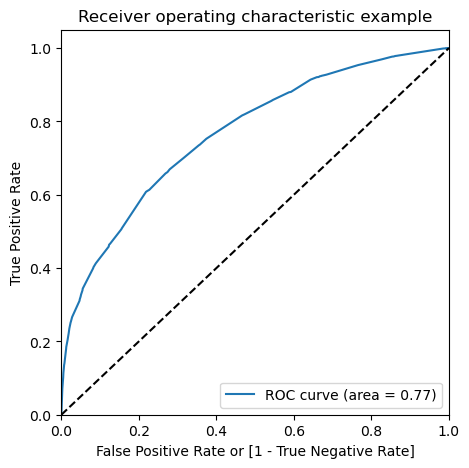

In [70]:
draw_roc(y_train_pred_final['Opportunity Status'], y_train_pred_final.Status_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [71]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Status_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Opportunity Status  Status_Prob  Opportunity ID  predicted  0.0  0.1  0.2  \
0                   0     0.159984           45056          0    1    1    0   
1                   0     0.088014           11621          0    1    0    0   
2                   0     0.088014           44590          0    1    0    0   
3                   0     0.201874           73734          0    1    1    1   
4                   1     0.082784           61710          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0

In [72]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Opportunity Status'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.225443  1.000000  0.000000
0.1   0.1  0.463629  0.923739  0.329709
0.2   0.2  0.687936  0.700642  0.684238
0.3   0.3  0.782632  0.465768  0.874858
0.4   0.4  0.808832  0.348737  0.942748
0.5   0.5  0.813135  0.265167  0.972627
0.6   0.6  0.809931  0.220824  0.981397
0.7   0.7  0.804585  0.172663  0.988512
0.8   0.8  0.796217  0.113701  0.994870
0.9   0.9  0.780416  0.029075  0.999102


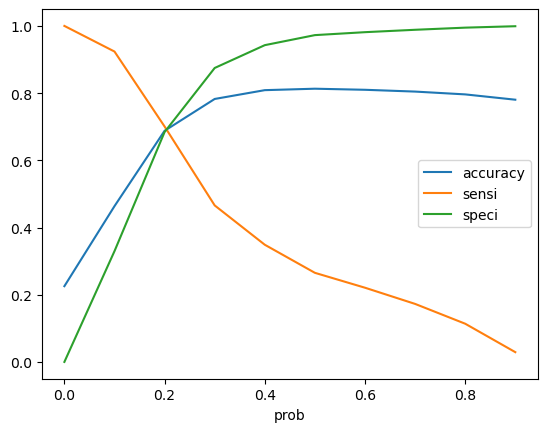

In [73]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Status_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Opportunity Status  Status_Prob  Opportunity ID  predicted  0.0  0.1  0.2  \
0                   0     0.159984           45056          0    1    1    0   
1                   0     0.088014           11621          0    1    0    0   
2                   0     0.088014           44590          0    1    0    0   
3                   0     0.201874           73734          0    1    1    1   
4                   1     0.082784           61710          0    1    0    0   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0    0                0  
2    0    0    0    0    0    0    0                0  
3    0    0    0    0    0    0    0                1  
4    0    0    0    0    0    0    0                0

In [75]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['Opportunity Status'], y_train_pred_final.final_predicted)

0.6879359906256294

In [76]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Opportunity Status'], y_train_pred_final.final_predicted )
confusion2

array([[28946, 13358],
       [ 3686,  8627]], dtype=int64)

In [77]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [78]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7006415983107285

In [79]:
# Let us calculate specificity
TN / float(TN+FP)

0.6842378971255674

In [80]:
# Calculate false postive rate - predicting won when it loss
print(FP/ float(TN+FP))

0.3157621028744327


In [81]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3924039117580168


In [82]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8870433929884776


## Precision and Recall

In [83]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final['Opportunity Status'], y_train_pred_final.predicted )
confusion

array([[41146,  1158],
       [ 9048,  3265]], dtype=int64)

##### Precision
TP / TP + FP

In [84]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7381867510739317

##### Recall
TP / TP + FN

In [85]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.26516689677576544

Using sklearn utilities for the same

In [86]:
from sklearn.metrics import precision_score, recall_score

In [87]:
precision_score(y_train_pred_final['Opportunity Status'], y_train_pred_final.predicted)

0.7381867510739317

In [88]:
recall_score(y_train_pred_final['Opportunity Status'], y_train_pred_final.predicted)

0.26516689677576544

### Precision and recall tradeoff

In [89]:
from sklearn.metrics import precision_recall_curve

In [90]:
y_train_pred_final['Opportunity Status'], y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        1
         ..
 54612    0
 54613    1
 54614    1
 54615    0
 54616    0
 Name: Opportunity Status, Length: 54617, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 54612    0
 54613    1
 54614    0
 54615    0
 54616    0
 Name: predicted, Length: 54617, dtype: int64)

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Opportunity Status'], y_train_pred_final.Status_Prob)

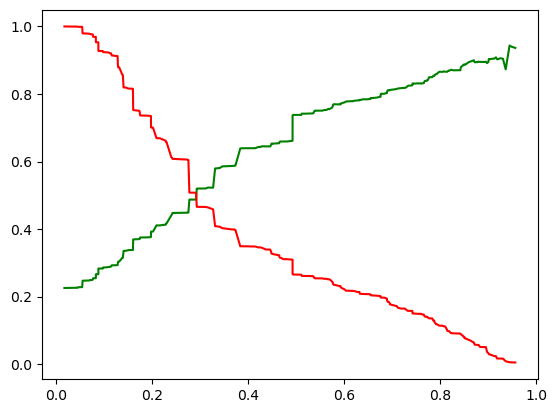

In [92]:
plt.plot(thresholds, p[:-1], "g-")   # precision has color green
plt.plot(thresholds, r[:-1], "r-")   # recall has color red
plt.show()

### Making predictions on the test set

In [93]:
X_test[['Sales Velocity']] = scaler.transform(X_test[['Sales Velocity']])

In [94]:
X_test = X_test[col]
X_test.head()

B2B Sales Medium_Online Leads  B2B Sales Medium_Partners  \
54446                              0                          0   
63361                              0                          0   
36047                              0                          0   
54833                              0                          0   
28012                              0                          0   

       B2B Sales Medium_Tele Sales  Business from Client Last Year_0 - 25,000  \
54446                            0                                          0   
63361                            0                                          0   
36047                            0                                          0   
54833                            0                                          0   
28012                            0                                          0   

       Business from Client Last Year_25,000 - 50,000  \
54446                                               0   
63361                                               0   
36047                                               0   
54833                                               0   
28012                                               0   

       Business from Client Last Year_50,000 - 100,000  \
54446                                                0   
63361                                                0   
36047                                                0   
54833                                                0   
28012                                                0   

       Business from Client Last Year_More than 100,000  \
54446                                                 0   
63361                                                 0   
36047                                                 0   
54833                                                 0   
28012                                                 1   

       Opportunity Sizing_10K to 20K  Opportunity Sizing_20K to 30K  \
54446                              0                              0   
63361                              0                              1   
36047                              0                              0   
54833                              1                              0   
28012                              0                              0   

       Opportunity Sizing_30K to 40K  Opportunity Sizing_40K to 50K  \
54446                              0                              1   
63361                              0                              0   
36047                              0                              1   
54833                              0                              0   
28012                              1                              0   

       Opportunity Sizing_50K to 60K  Opportunity Sizing_More than 60K  \
54446                              0                                 0   
63361                              0                                 0   
36047                              0                                 0   
54833                              0                                 0   
28012                              0                                 0   

       Sales Stage Iterations_(2, 3]  Sales Stage Iterations_(3, 23]  
54446                              0                               0  
63361                              0                               0  
36047                              1                               0  
54833                              1                               0  
28012                              0                               0

In [95]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [96]:
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

54446    0.054451
63361    0.138956
36047    0.082784
54833    0.229881
28012    0.345766
37610    0.088014
6746     0.492272
37500    0.851365
43179    0.128918
57959    0.275473
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
# Let's see the head
y_pred_1.head()

0
54446  0.054451
63361  0.138956
36047  0.082784
54833  0.229881
28012  0.345766

In [100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [101]:
# Putting Opportunity ID to index
y_test_df['Opportunity ID'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [104]:
y_pred_final.head()

Opportunity Status  Opportunity ID         0
0                   0           54446  0.054451
1                   0           63361  0.138956
2                   0           36047  0.082784
3                   1           54833  0.229881
4                   1           28012  0.345766

In [105]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Status_Prob'})

In [106]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Opportunity ID','Opportunity Status','Status_Prob'], axis=1)

In [107]:
# Let's see the head of y_pred_final
y_pred_final.head()

Opportunity ID  Opportunity Status  Status_Prob
0           54446                   0     0.054451
1           63361                   0     0.138956
2           36047                   0     0.082784
3           54833                   1     0.229881
4           28012                   1     0.345766

In [108]:
y_pred_final['final_predicted'] = y_pred_final.Status_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [109]:
y_pred_final.head()

Opportunity ID  Opportunity Status  Status_Prob  final_predicted
0           54446                   0     0.054451                0
1           63361                   0     0.138956                0
2           36047                   0     0.082784                0
3           54833                   1     0.229881                0
4           28012                   1     0.345766                1

In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Opportunity Status'], y_pred_final.final_predicted)

0.767130895420369

In [111]:
confusion2 = metrics.confusion_matrix(y_pred_final['Opportunity Status'], y_pred_final.final_predicted )
confusion2

array([[15240,  2854],
       [ 2597,  2717]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.511290929619872

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.8422681551895655

In [115]:
# Let's see the precision of our logistic regression model
confusion2[1,1]/(confusion[0,1]+confusion[1,1])

0.6142889441555506

In [116]:
# Let's see the recall of our logistic regression model
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.26516689677576544